In [1]:
import time
#import board
#import busio
import pandas as pd
from pandas import DataFrame
from matplotlib import pylab
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as clrs
import matplotlib.cm as cm
import matplotlib.dates as mdates
import matplotlib
import seaborn as sns
import datetime
import os
from pandas import concat
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime, timedelta

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.regularizers import l2
from numpy import loadtxt
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [2]:
def file():
    
    #path = '/home/yogender/Desktop/KaggleHousePricePrediction/raspiData/Raspi2_second_currentLoop_RemoteMySql'
    #file_name = 'csvFile_2021_04_20'
    #file_name = 'csvFile_2021_04_28'
    #file_name = 'csvFile_2021_04_28'
    file_name = 'csvFile_2021_05_24'
    #file_name = 'DLTemLongerDatasetDischargecsvFile_2021_05_20'
    #file_name = 'csvFile_2021_04_19'
    #file_name ='csvFile_2021_03_30'
    suffix = '.csv'
    filePath = os.path.join(os.getcwd(), file_name + suffix)
    return  filePath


In [3]:
def fileNameForDLFigures(midfix = None):
    
    
    from datetime import date
    today = date.today()
    # dd/mm/YY
    d1 = today.strftime("%d_%m_%Y")
    #print("d1 =", d1)
    cwdir = os.getcwd()
    mkSubDir =  os.path.join(cwdir, d1)
    mkSubDir
    if not os.path.exists(mkSubDir):
        #os.makedirs('my_folder')
        os.mkdir(mkSubDir)
    #path = '/home/yogender/Desktop/KaggleHousePricePrediction/raspiData/Raspi2_second_currentLoop_RemoteMySql'
    #file_name = 'csvFile_2021_04_20'
    head, tail = os.path.split(file())
    name =tail.split('_')[1:]
    file_name = "_".join(name)
    file_name=file_name.split('.')[0]
    #join

    #file_name = 'DL_2021_04_28'
    #file_name = 'csvFile_2021_04_19'
    #file_name ='csvFile_2021_03_30'
    
    #cwdir = os.getcwd()
    #mkSubDir =  os.path.join(cwdir, 'DL_sub')
    suffix = '.svg'
    filePath = os.path.join(mkSubDir, midfix + file_name +suffix)
    return  filePath

In [4]:
def modelDir(ModelName=None):
    model = fileNameForDLFigures(midfix = 'Tem').split('/')[:-1]
    model_dir = "/".join(model)
    #model_dir 
    modelPath = os.path.join(model_dir, ModelName)
    return modelPath

In [5]:
def filePath2Pandas(file_path):
    drop_column = 'Unnamed: 0'
    df = pd.read_csv(file_path, delimiter=',').drop(drop_column, axis = 'columns')

    column_names =  ['id', 'dateTime', 'Tamb', 'TtopTestTankHPCir', 'TbottomTestTankHpCir',
       'TtopSourceTank', 'TloadTankMix', 'TTopTestTankLoadCir', 'TloadMix',
       'TbottomSourceTank', 'TbottomTestTankLoadCir', 'T4', 'T3', 'T2', 'T1',
        'T0', 'T9', 'T8', 'T7', 'T6', 'T5', 'flowHP', 'flowLoad', 'Load_kW',
       'Heat_Capacity_kW', 'electrcity_kW', 'COP', 'nDis', 'timeStamp_Temp',
       'timeStamp_watt', 'entropy_kJ/K', 'entropy_kJ', 'nStratCharging',
       'TotalTanksEnergyForAvailability_kJ', 'DisEntropy_kj/K',
       'DisEntropy_kj', 'nStratDischarge',
       'DisTotalTanksEnergyForAvailability_kJ']
    df.columns =column_names
    df = df[['id', 'dateTime', 'Tamb', 'TtopTestTankHPCir', 'TbottomTestTankHpCir',
       'TtopSourceTank', 'TloadTankMix', 'TTopTestTankLoadCir', 'TloadMix',
       'TbottomSourceTank', 'TbottomTestTankLoadCir', 'T0', 'T1', 'T2', 'T3',
        'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'flowHP', 'flowLoad', 'Load_kW',
       'Heat_Capacity_kW', 'electrcity_kW', 'COP', 'nDis', 'timeStamp_Temp',
       'timeStamp_watt', 'entropy_kJ/K', 'entropy_kJ', 'nStratCharging',
       'TotalTanksEnergyForAvailability_kJ', 'DisEntropy_kj/K',
       'DisEntropy_kj', 'nStratDischarge',
       'DisTotalTanksEnergyForAvailability_kJ']]
    
    #df.columns.values[[11,12,13,14,15,16,17,18,19,20]] = ['T0', 'T1', 'T2', 'T3','T4', 'T5', 'T6', 'T7', 'T8', 'T9']

    return df
df_gross=filePath2Pandas(file())  


In [26]:

def charge_df(df):
    #df_tem = df[['T4', 'T3', 'T2', 'T1','T0', 'T9', 'T8', 'T7', 'T6', 'T5']]
    ##df_tem = df_tem[df_tem>0]
    #df_charging = df.loc[df_gross['Heat_Capacity_kW']>0.2]
    chargeAvailability = df_gross[['TotalTanksEnergyForAvailability_kJ']].dropna()
    #chargeAvailability
    chargeEntropy = df_gross[['entropy_kJ/K']].dropna()
    #chargeEntropy
    len_tocut = len(chargeAvailability)
    print (len_tocut)
    #df_tem = df_charging[['T4', 'T3', 'T2', 'T1','T0', 'T9', 'T8', 'T7', 'T6', 'T5']]
    df_all = df[['T0', 'T1', 'T2', 'T3','T4', 'T5', 'T6', 'T7', 'T8', 'T9']]
    df_extraFeatures = df[['flowHP']]
    df_conc = pd.concat( [df_extraFeatures,df_all],  ignore_index=True, axis =1 )
    #df_chargeFilter = df_charging_all[(df_charging_all['nStratCharging']>0.000001)&\
    #                           (df_charging_all['nStratCharging']<1.1)]
    #df_charging_all.dropna()
    indexed_df = df_conc.iloc[:len_tocut, :].reset_index(drop=True)
    df_conc_all = pd.concat( [chargeEntropy,chargeAvailability,indexed_df ],  ignore_index=True, axis =1 )
    #df_conc_all.columns =  ['entropyCH', 'availabilityCH', 'flowHPCH', 'T0', 'T1', 'T2', 'T3', \
    #              'T4', 'T5', 'T6', 'T7', 'T8', 'T9']
    return  df_conc_all 

allchanrgeInput= charge_df(df_gross)

658


In [27]:
allchanrgeInput

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,54.609485,39752.156577,-0.463734,22.6232,23.0288,23.2993,23.8403,24.0770,24.4490,24.7534,25.3284,25.6329,25.6329
1,52.149701,39810.968785,-0.463734,22.6232,22.9950,23.3331,23.8064,24.0770,24.4152,24.7534,25.3284,25.6667,25.6329
2,55.282852,39789.527760,-0.463734,22.6232,23.0288,23.3331,23.8064,24.0770,24.4490,24.8548,25.2946,25.5991,25.5991
3,52.400581,39752.147237,6.622280,22.6232,23.0288,23.2993,23.8064,24.0432,24.3813,24.8887,25.2946,25.6329,25.5991
4,25.363981,39811.013398,4.260270,22.6232,23.0288,23.3331,23.7726,24.0770,24.5843,24.8887,25.3284,25.6667,25.6667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
653,0.354437,79546.249080,963.234000,37.0878,50.3198,50.8652,51.4447,51.6834,52.4336,52.8429,53.1158,53.0476,52.6724
654,1.648305,79585.578596,965.596000,37.0199,50.3539,50.8993,51.4788,51.6834,52.5359,52.8770,53.0817,53.0817,52.6724
655,0.677954,79625.594053,960.872000,37.0199,50.3880,50.9334,51.4788,51.7516,52.5018,52.8770,53.0476,53.0476,52.7065
656,-2.640275,79684.104518,963.234000,37.0878,50.4561,51.0015,51.5129,51.8198,52.6724,52.7747,52.8429,52.9452,52.7406


In [13]:
def DisAll_df(df):
    #df_tem = df[['T4', 'T3', 'T2', 'T1','T0', 'T9', 'T8', 'T7', 'T6', 'T5']]
    ##df_tem = df_tem[df_tem>0]
    #df_charging = df.loc[df_gross['Heat_Capacity_kW']>0.2]
    disAvailability = df[['DisTotalTanksEnergyForAvailability_kJ']].dropna()
    #chargeAvailability
    dischargeEntropy = df[['DisEntropy_kj/K']].dropna()
    #chargeEntropy
    len_tocut =  len(df_gross) -len(disAvailability)
    print (len_tocut)
    #df_tem = df_charging[['T4', 'T3', 'T2', 'T1','T0', 'T9', 'T8', 'T7', 'T6', 'T5']]
    df_all = df[['T0', 'T1', 'T2', 'T3','T4', 'T5', 'T6', 'T7', 'T8', 'T9']]
    df_extraFeatures = df[['flowLoad']]
    #print (df_extraFeatures)
    df_conc = pd.concat( [df_extraFeatures,df_all],  ignore_index=True, axis =1 )
    #df_chargeFilter = df_charging_all[(df_charging_all['nStratCharging']>0.000001)&\
    #                           (df_charging_all['nStratCharging']<1.1)]
    #df_charging_all.dropna()
    #indexed_tem = allTem.iloc[len_tocut:, :].reset_index(drop=True)
    indexed_df = df_conc.iloc[len_tocut:, :].reset_index(drop=True)
    #print (indexed_df)
    df_conc_all = pd.concat( [dischargeEntropy,disAvailability ,indexed_df ],  ignore_index=True, axis =1 )
    #print ('concated is ', df_conc)
    return  df_conc_all 

allDisInput= DisAll_df(df_gross)

670


In [12]:
allDisInput

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,23.734946,79769.781970,290.115,37.5292,50.8993,51.3765,51.8880,52.3313,52.5359,52.4336,52.6042,52.7065,52.5359
1,36.880383,79740.380938,312.208,37.2915,50.8652,51.3425,51.9903,52.3313,52.5700,52.4336,52.6042,52.6724,52.5359
2,54.374602,79709.224371,332.723,36.9860,50.8652,51.3765,51.9221,52.3313,52.4677,52.4336,52.6042,52.6724,52.5359
3,63.318973,79643.287819,333.512,37.3594,50.6266,51.3425,52.0244,52.3313,52.5359,52.4336,52.6042,52.6724,52.5018
4,66.200057,79680.199209,326.411,37.5292,50.2516,51.3425,52.0244,52.3313,52.4336,52.4677,52.6042,52.6724,52.5359
...,...,...,...,...,...,...,...,...,...,...,...,...,...
621,949.165576,43129.535238,265.654,22.2852,24.2461,24.2461,24.4828,24.3137,24.4828,24.5166,24.7196,25.5991,45.9600
622,938.242927,43156.627376,266.443,22.2852,24.2461,24.2799,24.4828,24.3475,24.4490,24.5504,24.7196,25.4637,45.9260
623,927.850874,43140.974345,267.232,22.2852,24.2799,24.2799,24.4828,24.3813,24.5843,24.5843,24.6857,25.3961,45.7218
624,922.728072,43132.387203,267.232,22.2852,24.2799,24.2799,24.4828,24.3813,24.7872,24.5504,24.6857,25.3284,45.4835


In [ ]:
a = numpy.zeros(shape=(3,24))

In [57]:
def legodf(df_ch, df_dis):
    df_chTem = df_ch.iloc[:, 3:]
    df_disTem = df_dis.iloc[:, 3:]
    join_tem = pd.concat( [df_ch.iloc[:, 3:],\
                           df_dis.iloc[:, 3:] ],  ignore_index=True, axis =0)
    fea_ch = df_ch.iloc[:, 0:3]
    #a = np.zeros(shape=(len(df_dis), 3))
    #print (a.shape)
    zero_df_ch = pd.DataFrame(np.zeros(shape=(len(df_dis), 3)))
    join_fea_ch = pd.concat( [fea_ch,\
                           zero_df_ch ],  ignore_index=True, axis =0)
    #print (dataframe_ch)
    fea_dis = df_dis.iloc[:, 0:3]
    
    zero_df_dis = pd.DataFrame(np.zeros(shape=(len(df_ch), 3)))
    #print(len ((zero_df_dis)), len(df_ch), len(df_dis))
    join_fea_dis = pd.concat( [zero_df_dis, fea_dis ],  ignore_index=True, axis =0)
    
    tem_fea_ch_dis_df = pd.concat( [join_fea_ch,join_fea_dis, join_tem ],  ignore_index=True, axis =1)
    
    #print (tem_fea_ch_dis_df)
    #print (join_fea_ch)
    #print ( join_fea_dis)
    return tem_fea_ch_dis_df
joinedTemFEA_ch_dis_df = legodf(allchanrgeInput, allDisInput)

/home/yogender/miniconda3/envs/kerasClone/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7b4d72b8d0>)

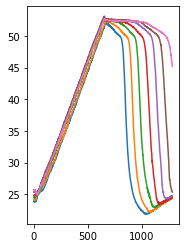

In [47]:
fig = plt.figure(1)
ax = fig.add_subplot(121)

#fig.canvas.draw()
fig.show()
#fig.canvas.draw()
#plt.rcParams["figure.figsize"]=5,5
#fig_size = plt.rcParams["figure.figsize"]
#fig_size[0] = 8
#fig_size[1] = 3

def plotObject(df, ax, fig, alpha =0.7, scm=None):
    #ax.clear()
    #df= df.iloc[:, 1:]
    df = df.iloc[:, 3:]
    for i in range (0, df.shape[1]):
        #print ('last shape[1] is:', df.shape[1])
        ax.plot(df.index, df.iloc[:, i],\
                label = 'Layer ' + str(i))
        
    #fig.canvas.draw()
    #ax.legend()
    #fig.show()
    #print ('df is :', df)
    #plt.legend(loc='upper left')
    return fig, ax
plotObject(joinedTem, ax, fig, alpha =0.7, scm=None)

In [58]:
joinedTemFEA_ch_dis_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,54.609485,39752.156577,-0.463734,0.000000,0.000000,0.000,22.6232,23.0288,23.2993,23.8403,24.0770,24.4490,24.7534,25.3284,25.6329,25.6329
1,52.149701,39810.968785,-0.463734,0.000000,0.000000,0.000,22.6232,22.9950,23.3331,23.8064,24.0770,24.4152,24.7534,25.3284,25.6667,25.6329
2,55.282852,39789.527760,-0.463734,0.000000,0.000000,0.000,22.6232,23.0288,23.3331,23.8064,24.0770,24.4490,24.8548,25.2946,25.5991,25.5991
3,52.400581,39752.147237,6.622280,0.000000,0.000000,0.000,22.6232,23.0288,23.2993,23.8064,24.0432,24.3813,24.8887,25.2946,25.6329,25.5991
4,25.363981,39811.013398,4.260270,0.000000,0.000000,0.000,22.6232,23.0288,23.3331,23.7726,24.0770,24.5843,24.8887,25.3284,25.6667,25.6667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1279,0.000000,0.000000,0.000000,949.165576,43129.535238,265.654,22.2852,24.2461,24.2461,24.4828,24.3137,24.4828,24.5166,24.7196,25.5991,45.9600
1280,0.000000,0.000000,0.000000,938.242927,43156.627376,266.443,22.2852,24.2461,24.2799,24.4828,24.3475,24.4490,24.5504,24.7196,25.4637,45.9260
1281,0.000000,0.000000,0.000000,927.850874,43140.974345,267.232,22.2852,24.2799,24.2799,24.4828,24.3813,24.5843,24.5843,24.6857,25.3961,45.7218
1282,0.000000,0.000000,0.000000,922.728072,43132.387203,267.232,22.2852,24.2799,24.2799,24.4828,24.3813,24.7872,24.5504,24.6857,25.3284,45.4835


In [60]:
"""
Normalization should be done BEFORE one prepares the data for ANN or LSTM input.
Normalization is done feature-wise (that means column-wise).
"""

def normalize(X):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaler = scaler.fit(X)
    scaled_data = scaler.transform(X)
    return scaled_data, scaler

df_nrm_dis, scaler = normalize(joinedTemFEA_ch_dis_df)
df_nrm_dis = pd.DataFrame(df_nrm_dis)
#df_nrm.columns = chargingIn_df.columns

df_nrm_dis.columns = ['entropyCH', 'availabilityCH', 'flowCHHP','entropyDis', \
                      'availabilitydis', 'flowDis', 'T0', 'T1', 'T2', 'T3',\
                      'T4', 'T5', 'T6', 'T7', 'T8', 'T9']
df_nrm_dis

,entropyCH,availabilityCH,flowCHHP,entropyDis,availabilitydis,flowDis,T0,T1,T2,T3,T4,T5,T6,T7,T8,T9
0,0.457054,0.498872,0.004843,0.000000,0.000000,0.000000,0.065671,0.047368,0.055705,0.064896,0.064895,0.051096,0.045891,0.036361,0.018150,0.021969
1,0.449065,0.499610,0.004843,0.000000,0.000000,0.000000,0.065671,0.046212,0.056842,0.063774,0.064895,0.049961,0.045891,0.036361,0.019359,0.021969
2,0.459242,0.499341,0.004843,0.000000,0.000000,0.000000,0.065671,0.047368,0.056842,0.063774,0.064895,0.051096,0.049331,0.035189,0.016941,0.020749
3,0.449880,0.498872,0.012107,0.000000,0.000000,0.000000,0.065671,0.047368,0.055705,0.063774,0.063776,0.048823,0.050481,0.035189,0.018150,0.020749
4,0.362067,0.499610,0.009685,0.000000,0.000000,0.000000,0.065671,0.047368,0.056842,0.062655,0.064895,0.055640,0.050481,0.036361,0.019359,0.023188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1279,0.279687,0.000000,0.005318,0.916831,0.540675,0.796535,0.044485,0.088976,0.087548,0.086162,0.072729,0.052231,0.037858,0.015248,0.016941,0.755360
1280,0.279687,0.000000,0.005318,0.906281,0.541015,0.798901,0.044485,0.088976,0.088684,0.086162,0.073847,0.051096,0.039004,0.015248,0.012097,0.754133
1281,0.279687,0.000000,0.005318,0.896242,0.540819,0.801267,0.044485,0.090131,0.088684,0.086162,0.074966,0.055640,0.040154,0.014073,0.009679,0.746765
1282,0.279687,0.000000,0.005318,0.891294,0.540711,0.801267,0.044485,0.090131,0.088684,0.086162,0.074966,0.062453,0.039004,0.014073,0.007258,0.738168


In [81]:
k =3
n_features = 16
#out_features = y_train.shape[1]
#out_features
epochs =5000
batch_size = 50

NameError: name 'y_train' is not defined

In [62]:
def flatten_row_wise(df):
    """Take row by row and attach to one flat single row."""
    #arr = np.ndarray.flatten(np.array(df))
    #append(arr,)
    
    return np.ndarray.flatten(np.array(df))
def prepare_df(df, m, y_df):
    n_rows, n_cols = df.shape
    new_rows = np.array([np.append(flatten_row_wise(df.iloc[(i-k):i]), \
                                   m.iloc[i-k:i, :]) for i in range(k, n_rows)])
    new_ys = np.array([row for row in y_df.iloc[(k):, :].itertuples(index=False)])
    # idxs = [x[0] for x in new_ys]
    # new_ys = [x[1] for x in new_ys]
    return new_rows, new_ys

In [65]:
 df_nrm_dis

,entropyCH,availabilityCH,flowCHHP,entropyDis,availabilitydis,flowDis,T0,T1,T2,T3,T4,T5,T6,T7,T8,T9
0,0.457054,0.498872,0.004843,0.000000,0.000000,0.000000,0.065671,0.047368,0.055705,0.064896,0.064895,0.051096,0.045891,0.036361,0.018150,0.021969
1,0.449065,0.499610,0.004843,0.000000,0.000000,0.000000,0.065671,0.046212,0.056842,0.063774,0.064895,0.049961,0.045891,0.036361,0.019359,0.021969
2,0.459242,0.499341,0.004843,0.000000,0.000000,0.000000,0.065671,0.047368,0.056842,0.063774,0.064895,0.051096,0.049331,0.035189,0.016941,0.020749
3,0.449880,0.498872,0.012107,0.000000,0.000000,0.000000,0.065671,0.047368,0.055705,0.063774,0.063776,0.048823,0.050481,0.035189,0.018150,0.020749
4,0.362067,0.499610,0.009685,0.000000,0.000000,0.000000,0.065671,0.047368,0.056842,0.062655,0.064895,0.055640,0.050481,0.036361,0.019359,0.023188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1279,0.279687,0.000000,0.005318,0.916831,0.540675,0.796535,0.044485,0.088976,0.087548,0.086162,0.072729,0.052231,0.037858,0.015248,0.016941,0.755360
1280,0.279687,0.000000,0.005318,0.906281,0.541015,0.798901,0.044485,0.088976,0.088684,0.086162,0.073847,0.051096,0.039004,0.015248,0.012097,0.754133
1281,0.279687,0.000000,0.005318,0.896242,0.540819,0.801267,0.044485,0.090131,0.088684,0.086162,0.074966,0.055640,0.040154,0.014073,0.009679,0.746765
1282,0.279687,0.000000,0.005318,0.891294,0.540711,0.801267,0.044485,0.090131,0.088684,0.086162,0.074966,0.062453,0.039004,0.014073,0.007258,0.738168


In [70]:
X_dis = df_nrm_dis.iloc[:, 6:]
y_dis =df_nrm_dis.iloc[:, 6:]
#mh_dis = df_nrm_dis[[ 'entropy', 'availability', 'flowLoad']]
mh_dis = df_nrm_dis.iloc[:, :6]
X_dis

,T0,T1,T2,T3,T4,T5,T6,T7,T8,T9
0,0.065671,0.047368,0.055705,0.064896,0.064895,0.051096,0.045891,0.036361,0.018150,0.021969
1,0.065671,0.046212,0.056842,0.063774,0.064895,0.049961,0.045891,0.036361,0.019359,0.021969
2,0.065671,0.047368,0.056842,0.063774,0.064895,0.051096,0.049331,0.035189,0.016941,0.020749
3,0.065671,0.047368,0.055705,0.063774,0.063776,0.048823,0.050481,0.035189,0.018150,0.020749
4,0.065671,0.047368,0.056842,0.062655,0.064895,0.055640,0.050481,0.036361,0.019359,0.023188
...,...,...,...,...,...,...,...,...,...,...
1279,0.044485,0.088976,0.087548,0.086162,0.072729,0.052231,0.037858,0.015248,0.016941,0.755360
1280,0.044485,0.088976,0.088684,0.086162,0.073847,0.051096,0.039004,0.015248,0.012097,0.754133
1281,0.044485,0.090131,0.088684,0.086162,0.074966,0.055640,0.040154,0.014073,0.009679,0.746765
1282,0.044485,0.090131,0.088684,0.086162,0.074966,0.062453,0.039004,0.014073,0.007258,0.738168


In [71]:
X_dis_df1, y_dis_df1 = prepare_df(X_dis, mh_dis, y_dis)

In [72]:
X_dis_df1.shape

(1281, 48)

In [73]:
y_dis_df1.shape

(1281, 10)

In [74]:
def train_test_split_indexes(X, y, test_size=0.2, random_state=42, shuffle=False):
    X_train_indexes, X_test_indexes, y_train_indexes, y_test_indexes = train_test_split(pd.DataFrame(list(range(X.shape[0]))),
                                                                                        pd.DataFrame(list(range(y.shape[0]))),
                                                                                        test_size=test_size,
                                                                                        random_state=random_state,
                                                                                        shuffle=shuffle)
    train_indexes, test_indexes = [x for x in X_train_indexes.iloc[:, 0]]  , [x for x in X_test_indexes.iloc[:, 0]]
    return sorted(train_indexes), sorted(test_indexes)


In [75]:
def splitter(X, y, train_indexes, test_indexes):
    X_train = X.iloc[train_indexes, :]
    y_train = y.iloc[train_indexes, :]
    X_test = X.iloc[test_indexes, :]
    y_test = y.iloc[test_indexes, :]
    return X_train, X_test, y_train, y_test


In [76]:
train_indexes, test_indexes = train_test_split_indexes(X_dis_df1, y_dis_df1, test_size=0.2, random_state=42, shuffle=True)
X_dis_train, X_dis_test, y_dis_train, y_dis_test = splitter(pd.DataFrame(X_dis_df1), pd.DataFrame(y_dis_df1), train_indexes, test_indexes)



In [77]:
X_dis_train = np.array(X_dis_train)

X_dis_test = np.array(X_dis_test)

y_dis_train = np.array(y_dis_train)

y_dis_test = np.array(y_dis_test)

In [78]:
X_dis_train.shape, y_dis_train.shape

((1024, 48), (1024, 10))

In [79]:
def create_model_dis(time_steps, n_features):
    model = Sequential()
    model.add(LSTM(10, input_shape = (time_steps, n_features)))
    #model.add(Dropout(0.2))
    
    #model.add(Dense(3))
    model.add(Dense(out_features, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
    return model

#So the val loss depends on the number of LSRTM nurons, 8 is reducing the val loss untill 0.208 thn
#increases
#Dense layer dosent work

In [83]:
out_features = y_dis_train.shape[1]

In [84]:

model_dis = create_model_dis(k, n_features)
model_fpath=modelDir(ModelName='added_features1_dis_ch.h5')
callbacks_list = [ ModelCheckpoint(filepath=model_fpath,
                                   monitor="val_loss",
                                   save_best_only=True,                 
                                   mode="min")]

In [85]:
history_dis = model_dis.fit(X_dis_train.reshape(X_dis_train.shape[0], k, n_features),
                    y_dis_train.reshape(y_dis_train.shape[0], out_features),
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.3,
                    callbacks = callbacks_list,
                    verbose=1)

Train on 716 samples, validate on 308 samples
Epoch 1/5000
716/716 [==============================] - 1s 2ms/step - loss: 0.4188 - mean_squared_error: 0.4188 - val_loss: 0.1915 - val_mean_squared_error: 0.1915
Epoch 2/5000
716/716 [==============================] - 0s 214us/step - loss: 0.3014 - mean_squared_error: 0.3014 - val_loss: 0.1335 - val_mean_squared_error: 0.1335
Epoch 3/5000
716/716 [==============================] - 0s 169us/step - loss: 0.2145 - mean_squared_error: 0.2145 - val_loss: 0.1031 - val_mean_squared_error: 0.1031
Epoch 4/5000
716/716 [==============================] - 0s 160us/step - loss: 0.1538 - mean_squared_error: 0.1538 - val_loss: 0.0947 - val_mean_squared_error: 0.0947
Epoch 5/5000
716/716 [==============================] - 0s 154us/step - loss: 0.1126 - mean_squared_error: 0.1126 - val_loss: 0.0952 - val_mean_squared_error: 0.0952
Epoch 6/5000
716/716 [==============================] - 0s 157us/step - loss: 0.0826 - mean_squared_error: 0.0826 - val_loss: 

Epoch 50/5000
716/716 [==============================] - 0s 214us/step - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.1048 - val_mean_squared_error: 0.1048
Epoch 51/5000
716/716 [==============================] - 0s 419us/step - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.1057 - val_mean_squared_error: 0.1057
Epoch 52/5000
716/716 [==============================] - 0s 301us/step - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.1060 - val_mean_squared_error: 0.1060
Epoch 53/5000
716/716 [==============================] - 0s 369us/step - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.1063 - val_mean_squared_error: 0.1063
Epoch 54/5000
716/716 [==============================] - 0s 248us/step - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.1065 - val_mean_squared_error: 0.1065
Epoch 55/5000
716/716 [==============================] - 0s 180us/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.1075 - val_mean_squared_error: 0.107

716/716 [==============================] - 0s 232us/step - loss: 8.3806e-04 - mean_squared_error: 8.3806e-04 - val_loss: 0.1104 - val_mean_squared_error: 0.1104
Epoch 99/5000
716/716 [==============================] - 0s 240us/step - loss: 8.2163e-04 - mean_squared_error: 8.2163e-04 - val_loss: 0.1106 - val_mean_squared_error: 0.1106
Epoch 100/5000
716/716 [==============================] - 0s 162us/step - loss: 8.1155e-04 - mean_squared_error: 8.1155e-04 - val_loss: 0.1108 - val_mean_squared_error: 0.1108
Epoch 101/5000
716/716 [==============================] - 0s 163us/step - loss: 8.0517e-04 - mean_squared_error: 8.0517e-04 - val_loss: 0.1098 - val_mean_squared_error: 0.1098
Epoch 102/5000
716/716 [==============================] - 0s 161us/step - loss: 7.9434e-04 - mean_squared_error: 7.9434e-04 - val_loss: 0.1100 - val_mean_squared_error: 0.1100
Epoch 103/5000
716/716 [==============================] - 0s 147us/step - loss: 7.8779e-04 - mean_squared_error: 7.8779e-04 - val_loss: 

716/716 [==============================] - 0s 181us/step - loss: 5.3663e-04 - mean_squared_error: 5.3663e-04 - val_loss: 0.1120 - val_mean_squared_error: 0.1120
Epoch 145/5000
716/716 [==============================] - 0s 175us/step - loss: 5.1741e-04 - mean_squared_error: 5.1741e-04 - val_loss: 0.1127 - val_mean_squared_error: 0.1127
Epoch 146/5000
716/716 [==============================] - 0s 184us/step - loss: 5.1826e-04 - mean_squared_error: 5.1826e-04 - val_loss: 0.1116 - val_mean_squared_error: 0.1116
Epoch 147/5000
716/716 [==============================] - 0s 225us/step - loss: 5.2440e-04 - mean_squared_error: 5.2440e-04 - val_loss: 0.1130 - val_mean_squared_error: 0.1130
Epoch 148/5000
716/716 [==============================] - 0s 188us/step - loss: 5.1167e-04 - mean_squared_error: 5.1167e-04 - val_loss: 0.1120 - val_mean_squared_error: 0.1120
Epoch 149/5000
716/716 [==============================] - 0s 244us/step - loss: 5.0278e-04 - mean_squared_error: 5.0278e-04 - val_loss:

716/716 [==============================] - 0s 245us/step - loss: 3.4947e-04 - mean_squared_error: 3.4947e-04 - val_loss: 0.1156 - val_mean_squared_error: 0.1156
Epoch 191/5000
716/716 [==============================] - 0s 167us/step - loss: 3.4247e-04 - mean_squared_error: 3.4247e-04 - val_loss: 0.1168 - val_mean_squared_error: 0.1168
Epoch 192/5000
716/716 [==============================] - 0s 156us/step - loss: 3.4636e-04 - mean_squared_error: 3.4636e-04 - val_loss: 0.1163 - val_mean_squared_error: 0.1163
Epoch 193/5000
716/716 [==============================] - 0s 194us/step - loss: 3.4124e-04 - mean_squared_error: 3.4124e-04 - val_loss: 0.1165 - val_mean_squared_error: 0.1165
Epoch 194/5000
716/716 [==============================] - 0s 181us/step - loss: 3.3273e-04 - mean_squared_error: 3.3273e-04 - val_loss: 0.1169 - val_mean_squared_error: 0.1169
Epoch 195/5000
716/716 [==============================] - 0s 161us/step - loss: 3.3338e-04 - mean_squared_error: 3.3338e-04 - val_loss:

716/716 [==============================] - 0s 224us/step - loss: 2.1315e-04 - mean_squared_error: 2.1315e-04 - val_loss: 0.1195 - val_mean_squared_error: 0.1195
Epoch 237/5000
716/716 [==============================] - 0s 183us/step - loss: 2.1026e-04 - mean_squared_error: 2.1026e-04 - val_loss: 0.1209 - val_mean_squared_error: 0.1209
Epoch 238/5000
716/716 [==============================] - 0s 213us/step - loss: 2.0477e-04 - mean_squared_error: 2.0477e-04 - val_loss: 0.1207 - val_mean_squared_error: 0.1207
Epoch 239/5000
716/716 [==============================] - 0s 189us/step - loss: 1.9878e-04 - mean_squared_error: 1.9878e-04 - val_loss: 0.1203 - val_mean_squared_error: 0.1203
Epoch 240/5000
716/716 [==============================] - 0s 205us/step - loss: 1.9685e-04 - mean_squared_error: 1.9685e-04 - val_loss: 0.1209 - val_mean_squared_error: 0.1209
Epoch 241/5000
716/716 [==============================] - 0s 225us/step - loss: 1.9929e-04 - mean_squared_error: 1.9929e-04 - val_loss:

716/716 [==============================] - 0s 216us/step - loss: 1.3601e-04 - mean_squared_error: 1.3601e-04 - val_loss: 0.1253 - val_mean_squared_error: 0.1253
Epoch 283/5000
716/716 [==============================] - 0s 204us/step - loss: 1.3502e-04 - mean_squared_error: 1.3502e-04 - val_loss: 0.1257 - val_mean_squared_error: 0.1257
Epoch 284/5000
716/716 [==============================] - 0s 194us/step - loss: 1.3319e-04 - mean_squared_error: 1.3319e-04 - val_loss: 0.1263 - val_mean_squared_error: 0.1263
Epoch 285/5000
716/716 [==============================] - 0s 168us/step - loss: 1.3592e-04 - mean_squared_error: 1.3592e-04 - val_loss: 0.1255 - val_mean_squared_error: 0.1255
Epoch 286/5000
716/716 [==============================] - 0s 162us/step - loss: 1.3168e-04 - mean_squared_error: 1.3168e-04 - val_loss: 0.1262 - val_mean_squared_error: 0.1262
Epoch 287/5000
716/716 [==============================] - 0s 159us/step - loss: 1.3022e-04 - mean_squared_error: 1.3022e-04 - val_loss:

716/716 [==============================] - 0s 246us/step - loss: 1.0282e-04 - mean_squared_error: 1.0282e-04 - val_loss: 0.1306 - val_mean_squared_error: 0.1306
Epoch 329/5000
716/716 [==============================] - 0s 203us/step - loss: 1.0221e-04 - mean_squared_error: 1.0221e-04 - val_loss: 0.1308 - val_mean_squared_error: 0.1308
Epoch 330/5000
716/716 [==============================] - 0s 231us/step - loss: 1.0015e-04 - mean_squared_error: 1.0015e-04 - val_loss: 0.1308 - val_mean_squared_error: 0.1308
Epoch 331/5000
716/716 [==============================] - 0s 211us/step - loss: 1.0102e-04 - mean_squared_error: 1.0102e-04 - val_loss: 0.1307 - val_mean_squared_error: 0.1307
Epoch 332/5000
716/716 [==============================] - 0s 244us/step - loss: 1.0199e-04 - mean_squared_error: 1.0199e-04 - val_loss: 0.1314 - val_mean_squared_error: 0.1314
Epoch 333/5000
716/716 [==============================] - 0s 200us/step - loss: 9.9395e-05 - mean_squared_error: 9.9395e-05 - val_loss:

716/716 [==============================] - 0s 297us/step - loss: 8.2047e-05 - mean_squared_error: 8.2047e-05 - val_loss: 0.1343 - val_mean_squared_error: 0.1343
Epoch 375/5000
716/716 [==============================] - 0s 243us/step - loss: 8.3369e-05 - mean_squared_error: 8.3369e-05 - val_loss: 0.1344 - val_mean_squared_error: 0.1344
Epoch 376/5000
716/716 [==============================] - 0s 278us/step - loss: 8.3573e-05 - mean_squared_error: 8.3573e-05 - val_loss: 0.1342 - val_mean_squared_error: 0.1342
Epoch 377/5000
716/716 [==============================] - 0s 650us/step - loss: 8.3344e-05 - mean_squared_error: 8.3344e-05 - val_loss: 0.1344 - val_mean_squared_error: 0.1344
Epoch 378/5000
716/716 [==============================] - 0s 320us/step - loss: 8.6982e-05 - mean_squared_error: 8.6982e-05 - val_loss: 0.1357 - val_mean_squared_error: 0.1357
Epoch 379/5000
716/716 [==============================] - 0s 230us/step - loss: 8.5383e-05 - mean_squared_error: 8.5383e-05 - val_loss:

716/716 [==============================] - 0s 273us/step - loss: 7.2402e-05 - mean_squared_error: 7.2402e-05 - val_loss: 0.1368 - val_mean_squared_error: 0.1368
Epoch 421/5000
716/716 [==============================] - 0s 219us/step - loss: 7.2887e-05 - mean_squared_error: 7.2887e-05 - val_loss: 0.1361 - val_mean_squared_error: 0.1361
Epoch 422/5000
716/716 [==============================] - 0s 202us/step - loss: 7.9892e-05 - mean_squared_error: 7.9892e-05 - val_loss: 0.1363 - val_mean_squared_error: 0.1363
Epoch 423/5000
716/716 [==============================] - 0s 207us/step - loss: 7.4445e-05 - mean_squared_error: 7.4445e-05 - val_loss: 0.1363 - val_mean_squared_error: 0.1363
Epoch 424/5000
716/716 [==============================] - 0s 184us/step - loss: 7.3918e-05 - mean_squared_error: 7.3918e-05 - val_loss: 0.1360 - val_mean_squared_error: 0.1360
Epoch 425/5000
716/716 [==============================] - 0s 204us/step - loss: 7.3116e-05 - mean_squared_error: 7.3116e-05 - val_loss:

716/716 [==============================] - 0s 224us/step - loss: 6.6132e-05 - mean_squared_error: 6.6132e-05 - val_loss: 0.1360 - val_mean_squared_error: 0.1360
Epoch 467/5000
716/716 [==============================] - 0s 179us/step - loss: 6.7547e-05 - mean_squared_error: 6.7547e-05 - val_loss: 0.1362 - val_mean_squared_error: 0.1362
Epoch 468/5000
716/716 [==============================] - 0s 209us/step - loss: 6.7516e-05 - mean_squared_error: 6.7516e-05 - val_loss: 0.1361 - val_mean_squared_error: 0.1361
Epoch 469/5000
716/716 [==============================] - 0s 189us/step - loss: 6.7237e-05 - mean_squared_error: 6.7237e-05 - val_loss: 0.1363 - val_mean_squared_error: 0.1363
Epoch 470/5000
716/716 [==============================] - 0s 217us/step - loss: 6.5912e-05 - mean_squared_error: 6.5912e-05 - val_loss: 0.1367 - val_mean_squared_error: 0.1367
Epoch 471/5000
716/716 [==============================] - 0s 229us/step - loss: 6.6728e-05 - mean_squared_error: 6.6728e-05 - val_loss:

716/716 [==============================] - 0s 298us/step - loss: 6.5670e-05 - mean_squared_error: 6.5670e-05 - val_loss: 0.1345 - val_mean_squared_error: 0.1345
Epoch 513/5000
716/716 [==============================] - 0s 231us/step - loss: 6.3288e-05 - mean_squared_error: 6.3288e-05 - val_loss: 0.1347 - val_mean_squared_error: 0.1347
Epoch 514/5000
716/716 [==============================] - 0s 251us/step - loss: 6.3909e-05 - mean_squared_error: 6.3909e-05 - val_loss: 0.1346 - val_mean_squared_error: 0.1346
Epoch 515/5000
716/716 [==============================] - 0s 203us/step - loss: 6.8910e-05 - mean_squared_error: 6.8910e-05 - val_loss: 0.1343 - val_mean_squared_error: 0.1343
Epoch 516/5000
716/716 [==============================] - 0s 173us/step - loss: 6.4371e-05 - mean_squared_error: 6.4371e-05 - val_loss: 0.1344 - val_mean_squared_error: 0.1344
Epoch 517/5000
716/716 [==============================] - 0s 224us/step - loss: 6.3588e-05 - mean_squared_error: 6.3588e-05 - val_loss:

716/716 [==============================] - 0s 239us/step - loss: 6.1080e-05 - mean_squared_error: 6.1080e-05 - val_loss: 0.1322 - val_mean_squared_error: 0.1322
Epoch 559/5000
716/716 [==============================] - 0s 218us/step - loss: 5.9485e-05 - mean_squared_error: 5.9485e-05 - val_loss: 0.1318 - val_mean_squared_error: 0.1318
Epoch 560/5000
716/716 [==============================] - 0s 201us/step - loss: 6.2079e-05 - mean_squared_error: 6.2079e-05 - val_loss: 0.1324 - val_mean_squared_error: 0.1324
Epoch 561/5000
716/716 [==============================] - 0s 194us/step - loss: 6.0317e-05 - mean_squared_error: 6.0317e-05 - val_loss: 0.1322 - val_mean_squared_error: 0.1322
Epoch 562/5000
716/716 [==============================] - 0s 211us/step - loss: 6.0118e-05 - mean_squared_error: 6.0118e-05 - val_loss: 0.1317 - val_mean_squared_error: 0.1317
Epoch 563/5000
716/716 [==============================] - 0s 218us/step - loss: 5.9765e-05 - mean_squared_error: 5.9765e-05 - val_loss:

716/716 [==============================] - 0s 217us/step - loss: 5.9487e-05 - mean_squared_error: 5.9487e-05 - val_loss: 0.1297 - val_mean_squared_error: 0.1297
Epoch 605/5000
716/716 [==============================] - 0s 216us/step - loss: 5.8798e-05 - mean_squared_error: 5.8798e-05 - val_loss: 0.1300 - val_mean_squared_error: 0.1300
Epoch 606/5000
716/716 [==============================] - 0s 212us/step - loss: 5.7143e-05 - mean_squared_error: 5.7143e-05 - val_loss: 0.1295 - val_mean_squared_error: 0.1295
Epoch 607/5000
716/716 [==============================] - 0s 261us/step - loss: 5.8278e-05 - mean_squared_error: 5.8278e-05 - val_loss: 0.1300 - val_mean_squared_error: 0.1300
Epoch 608/5000
716/716 [==============================] - 0s 218us/step - loss: 5.9908e-05 - mean_squared_error: 5.9908e-05 - val_loss: 0.1296 - val_mean_squared_error: 0.1296
Epoch 609/5000
716/716 [==============================] - 0s 307us/step - loss: 5.8160e-05 - mean_squared_error: 5.8160e-05 - val_loss:

716/716 [==============================] - 0s 241us/step - loss: 5.4485e-05 - mean_squared_error: 5.4485e-05 - val_loss: 0.1276 - val_mean_squared_error: 0.1276
Epoch 651/5000
716/716 [==============================] - 0s 214us/step - loss: 5.4810e-05 - mean_squared_error: 5.4810e-05 - val_loss: 0.1275 - val_mean_squared_error: 0.1275
Epoch 652/5000
716/716 [==============================] - 0s 238us/step - loss: 5.3471e-05 - mean_squared_error: 5.3471e-05 - val_loss: 0.1273 - val_mean_squared_error: 0.1273
Epoch 653/5000
716/716 [==============================] - 0s 223us/step - loss: 5.3737e-05 - mean_squared_error: 5.3737e-05 - val_loss: 0.1274 - val_mean_squared_error: 0.1274
Epoch 654/5000
716/716 [==============================] - 0s 200us/step - loss: 5.4263e-05 - mean_squared_error: 5.4263e-05 - val_loss: 0.1274 - val_mean_squared_error: 0.1274
Epoch 655/5000
716/716 [==============================] - 0s 214us/step - loss: 5.5700e-05 - mean_squared_error: 5.5700e-05 - val_loss:

716/716 [==============================] - 0s 288us/step - loss: 5.4547e-05 - mean_squared_error: 5.4547e-05 - val_loss: 0.1240 - val_mean_squared_error: 0.1240
Epoch 697/5000
716/716 [==============================] - 0s 192us/step - loss: 5.6632e-05 - mean_squared_error: 5.6632e-05 - val_loss: 0.1251 - val_mean_squared_error: 0.1251
Epoch 698/5000
716/716 [==============================] - 0s 163us/step - loss: 5.2259e-05 - mean_squared_error: 5.2259e-05 - val_loss: 0.1244 - val_mean_squared_error: 0.1244
Epoch 699/5000
716/716 [==============================] - 0s 163us/step - loss: 5.2359e-05 - mean_squared_error: 5.2359e-05 - val_loss: 0.1246 - val_mean_squared_error: 0.1246
Epoch 700/5000
716/716 [==============================] - 0s 212us/step - loss: 5.3735e-05 - mean_squared_error: 5.3735e-05 - val_loss: 0.1247 - val_mean_squared_error: 0.1247
Epoch 701/5000
716/716 [==============================] - 0s 226us/step - loss: 5.2806e-05 - mean_squared_error: 5.2806e-05 - val_loss:

716/716 [==============================] - 0s 308us/step - loss: 5.1511e-05 - mean_squared_error: 5.1511e-05 - val_loss: 0.1218 - val_mean_squared_error: 0.1218
Epoch 743/5000
716/716 [==============================] - 0s 267us/step - loss: 4.9285e-05 - mean_squared_error: 4.9285e-05 - val_loss: 0.1217 - val_mean_squared_error: 0.1217
Epoch 744/5000
716/716 [==============================] - 0s 308us/step - loss: 5.0035e-05 - mean_squared_error: 5.0035e-05 - val_loss: 0.1218 - val_mean_squared_error: 0.1218
Epoch 745/5000
716/716 [==============================] - 0s 305us/step - loss: 5.0359e-05 - mean_squared_error: 5.0359e-05 - val_loss: 0.1221 - val_mean_squared_error: 0.1221
Epoch 746/5000
716/716 [==============================] - 0s 248us/step - loss: 5.1810e-05 - mean_squared_error: 5.1810e-05 - val_loss: 0.1221 - val_mean_squared_error: 0.1221
Epoch 747/5000
716/716 [==============================] - 0s 530us/step - loss: 5.0455e-05 - mean_squared_error: 5.0455e-05 - val_loss:

716/716 [==============================] - 0s 265us/step - loss: 4.8495e-05 - mean_squared_error: 4.8495e-05 - val_loss: 0.1184 - val_mean_squared_error: 0.1184
Epoch 789/5000
716/716 [==============================] - 0s 195us/step - loss: 4.7338e-05 - mean_squared_error: 4.7338e-05 - val_loss: 0.1192 - val_mean_squared_error: 0.1192
Epoch 790/5000
716/716 [==============================] - 0s 186us/step - loss: 4.6056e-05 - mean_squared_error: 4.6056e-05 - val_loss: 0.1191 - val_mean_squared_error: 0.1191
Epoch 791/5000
716/716 [==============================] - 0s 301us/step - loss: 4.6959e-05 - mean_squared_error: 4.6959e-05 - val_loss: 0.1189 - val_mean_squared_error: 0.1189
Epoch 792/5000
716/716 [==============================] - 0s 287us/step - loss: 4.6319e-05 - mean_squared_error: 4.6319e-05 - val_loss: 0.1186 - val_mean_squared_error: 0.1186
Epoch 793/5000
716/716 [==============================] - 0s 202us/step - loss: 4.8782e-05 - mean_squared_error: 4.8782e-05 - val_loss:

716/716 [==============================] - 0s 219us/step - loss: 4.5680e-05 - mean_squared_error: 4.5680e-05 - val_loss: 0.1159 - val_mean_squared_error: 0.1159
Epoch 835/5000
716/716 [==============================] - 0s 257us/step - loss: 4.6026e-05 - mean_squared_error: 4.6026e-05 - val_loss: 0.1161 - val_mean_squared_error: 0.1161
Epoch 836/5000
716/716 [==============================] - 0s 168us/step - loss: 4.3886e-05 - mean_squared_error: 4.3886e-05 - val_loss: 0.1161 - val_mean_squared_error: 0.1161
Epoch 837/5000
716/716 [==============================] - 0s 169us/step - loss: 4.3764e-05 - mean_squared_error: 4.3764e-05 - val_loss: 0.1159 - val_mean_squared_error: 0.1159
Epoch 838/5000
716/716 [==============================] - 0s 235us/step - loss: 4.4440e-05 - mean_squared_error: 4.4440e-05 - val_loss: 0.1158 - val_mean_squared_error: 0.1158
Epoch 839/5000
716/716 [==============================] - 0s 300us/step - loss: 4.7762e-05 - mean_squared_error: 4.7762e-05 - val_loss:

716/716 [==============================] - 0s 298us/step - loss: 4.0645e-05 - mean_squared_error: 4.0645e-05 - val_loss: 0.1137 - val_mean_squared_error: 0.1137
Epoch 881/5000
716/716 [==============================] - 0s 287us/step - loss: 4.0858e-05 - mean_squared_error: 4.0858e-05 - val_loss: 0.1132 - val_mean_squared_error: 0.1132
Epoch 882/5000
716/716 [==============================] - 0s 303us/step - loss: 3.8668e-05 - mean_squared_error: 3.8668e-05 - val_loss: 0.1130 - val_mean_squared_error: 0.1130
Epoch 883/5000
716/716 [==============================] - 0s 381us/step - loss: 4.0023e-05 - mean_squared_error: 4.0023e-05 - val_loss: 0.1134 - val_mean_squared_error: 0.1134
Epoch 884/5000
716/716 [==============================] - 0s 231us/step - loss: 4.2302e-05 - mean_squared_error: 4.2302e-05 - val_loss: 0.1129 - val_mean_squared_error: 0.1129
Epoch 885/5000
716/716 [==============================] - 0s 258us/step - loss: 4.1490e-05 - mean_squared_error: 4.1490e-05 - val_loss:

716/716 [==============================] - 0s 229us/step - loss: 3.5605e-05 - mean_squared_error: 3.5605e-05 - val_loss: 0.1107 - val_mean_squared_error: 0.1107
Epoch 927/5000
716/716 [==============================] - 0s 250us/step - loss: 3.4505e-05 - mean_squared_error: 3.4505e-05 - val_loss: 0.1106 - val_mean_squared_error: 0.1106
Epoch 928/5000
716/716 [==============================] - 0s 256us/step - loss: 3.4684e-05 - mean_squared_error: 3.4684e-05 - val_loss: 0.1104 - val_mean_squared_error: 0.1104
Epoch 929/5000
716/716 [==============================] - 0s 309us/step - loss: 3.6331e-05 - mean_squared_error: 3.6331e-05 - val_loss: 0.1107 - val_mean_squared_error: 0.1107
Epoch 930/5000
716/716 [==============================] - 0s 309us/step - loss: 3.7850e-05 - mean_squared_error: 3.7850e-05 - val_loss: 0.1101 - val_mean_squared_error: 0.1101
Epoch 931/5000
716/716 [==============================] - 0s 225us/step - loss: 3.7074e-05 - mean_squared_error: 3.7074e-05 - val_loss:

716/716 [==============================] - 0s 326us/step - loss: 3.0117e-05 - mean_squared_error: 3.0117e-05 - val_loss: 0.1083 - val_mean_squared_error: 0.1083
Epoch 973/5000
716/716 [==============================] - 0s 262us/step - loss: 3.0997e-05 - mean_squared_error: 3.0997e-05 - val_loss: 0.1082 - val_mean_squared_error: 0.1082
Epoch 974/5000
716/716 [==============================] - 0s 321us/step - loss: 3.3293e-05 - mean_squared_error: 3.3293e-05 - val_loss: 0.1083 - val_mean_squared_error: 0.1083
Epoch 975/5000
716/716 [==============================] - 0s 275us/step - loss: 3.0833e-05 - mean_squared_error: 3.0833e-05 - val_loss: 0.1081 - val_mean_squared_error: 0.1081
Epoch 976/5000
716/716 [==============================] - 0s 219us/step - loss: 3.0912e-05 - mean_squared_error: 3.0912e-05 - val_loss: 0.1078 - val_mean_squared_error: 0.1078
Epoch 977/5000
716/716 [==============================] - 0s 290us/step - loss: 3.0633e-05 - mean_squared_error: 3.0633e-05 - val_loss:

716/716 [==============================] - 0s 286us/step - loss: 3.0917e-05 - mean_squared_error: 3.0917e-05 - val_loss: 0.1063 - val_mean_squared_error: 0.1063
Epoch 1019/5000
716/716 [==============================] - 0s 213us/step - loss: 2.9073e-05 - mean_squared_error: 2.9073e-05 - val_loss: 0.1065 - val_mean_squared_error: 0.1065
Epoch 1020/5000
716/716 [==============================] - 0s 217us/step - loss: 2.9252e-05 - mean_squared_error: 2.9252e-05 - val_loss: 0.1061 - val_mean_squared_error: 0.1061
Epoch 1021/5000
716/716 [==============================] - 0s 195us/step - loss: 2.9419e-05 - mean_squared_error: 2.9419e-05 - val_loss: 0.1063 - val_mean_squared_error: 0.1063
Epoch 1022/5000
716/716 [==============================] - 0s 217us/step - loss: 2.9091e-05 - mean_squared_error: 2.9091e-05 - val_loss: 0.1064 - val_mean_squared_error: 0.1064
Epoch 1023/5000
716/716 [==============================] - 0s 242us/step - loss: 2.8676e-05 - mean_squared_error: 2.8676e-05 - val_

716/716 [==============================] - 0s 254us/step - loss: 2.6494e-05 - mean_squared_error: 2.6494e-05 - val_loss: 0.1050 - val_mean_squared_error: 0.1050
Epoch 1065/5000
716/716 [==============================] - 0s 201us/step - loss: 2.7890e-05 - mean_squared_error: 2.7890e-05 - val_loss: 0.1048 - val_mean_squared_error: 0.1048
Epoch 1066/5000
716/716 [==============================] - 0s 217us/step - loss: 3.0020e-05 - mean_squared_error: 3.0020e-05 - val_loss: 0.1054 - val_mean_squared_error: 0.1054
Epoch 1067/5000
716/716 [==============================] - 0s 219us/step - loss: 3.0154e-05 - mean_squared_error: 3.0154e-05 - val_loss: 0.1046 - val_mean_squared_error: 0.1046
Epoch 1068/5000
716/716 [==============================] - 0s 198us/step - loss: 3.0630e-05 - mean_squared_error: 3.0630e-05 - val_loss: 0.1046 - val_mean_squared_error: 0.1046
Epoch 1069/5000
716/716 [==============================] - 0s 183us/step - loss: 2.9534e-05 - mean_squared_error: 2.9534e-05 - val_

716/716 [==============================] - 0s 265us/step - loss: 2.5500e-05 - mean_squared_error: 2.5500e-05 - val_loss: 0.1038 - val_mean_squared_error: 0.1038
Epoch 1111/5000
716/716 [==============================] - 0s 250us/step - loss: 2.5040e-05 - mean_squared_error: 2.5040e-05 - val_loss: 0.1034 - val_mean_squared_error: 0.1034
Epoch 1112/5000
716/716 [==============================] - 0s 269us/step - loss: 2.5322e-05 - mean_squared_error: 2.5322e-05 - val_loss: 0.1041 - val_mean_squared_error: 0.1041
Epoch 1113/5000
716/716 [==============================] - 0s 204us/step - loss: 2.4691e-05 - mean_squared_error: 2.4691e-05 - val_loss: 0.1036 - val_mean_squared_error: 0.1036
Epoch 1114/5000
716/716 [==============================] - 0s 236us/step - loss: 2.5963e-05 - mean_squared_error: 2.5963e-05 - val_loss: 0.1042 - val_mean_squared_error: 0.1042
Epoch 1115/5000
716/716 [==============================] - 0s 322us/step - loss: 2.4672e-05 - mean_squared_error: 2.4672e-05 - val_

716/716 [==============================] - 0s 233us/step - loss: 2.7471e-05 - mean_squared_error: 2.7471e-05 - val_loss: 0.1029 - val_mean_squared_error: 0.1029
Epoch 1157/5000
716/716 [==============================] - 0s 214us/step - loss: 3.1310e-05 - mean_squared_error: 3.1310e-05 - val_loss: 0.1033 - val_mean_squared_error: 0.1033
Epoch 1158/5000
716/716 [==============================] - 0s 210us/step - loss: 2.8830e-05 - mean_squared_error: 2.8830e-05 - val_loss: 0.1033 - val_mean_squared_error: 0.1033
Epoch 1159/5000
716/716 [==============================] - 0s 183us/step - loss: 2.5632e-05 - mean_squared_error: 2.5632e-05 - val_loss: 0.1028 - val_mean_squared_error: 0.1028
Epoch 1160/5000
716/716 [==============================] - 0s 205us/step - loss: 2.5767e-05 - mean_squared_error: 2.5767e-05 - val_loss: 0.1029 - val_mean_squared_error: 0.1029
Epoch 1161/5000
716/716 [==============================] - 0s 172us/step - loss: 2.4910e-05 - mean_squared_error: 2.4910e-05 - val_

716/716 [==============================] - 0s 252us/step - loss: 2.4954e-05 - mean_squared_error: 2.4954e-05 - val_loss: 0.1022 - val_mean_squared_error: 0.1022
Epoch 1203/5000
716/716 [==============================] - 0s 252us/step - loss: 2.3877e-05 - mean_squared_error: 2.3877e-05 - val_loss: 0.1021 - val_mean_squared_error: 0.1021
Epoch 1204/5000
716/716 [==============================] - 0s 222us/step - loss: 2.3823e-05 - mean_squared_error: 2.3823e-05 - val_loss: 0.1021 - val_mean_squared_error: 0.1021
Epoch 1205/5000
716/716 [==============================] - 0s 198us/step - loss: 2.3695e-05 - mean_squared_error: 2.3695e-05 - val_loss: 0.1025 - val_mean_squared_error: 0.1025
Epoch 1206/5000
716/716 [==============================] - 0s 187us/step - loss: 2.3510e-05 - mean_squared_error: 2.3510e-05 - val_loss: 0.1016 - val_mean_squared_error: 0.1016
Epoch 1207/5000
716/716 [==============================] - 0s 244us/step - loss: 2.6563e-05 - mean_squared_error: 2.6563e-05 - val_

716/716 [==============================] - 0s 352us/step - loss: 2.7937e-05 - mean_squared_error: 2.7937e-05 - val_loss: 0.1007 - val_mean_squared_error: 0.1007
Epoch 1249/5000
716/716 [==============================] - 0s 214us/step - loss: 2.5381e-05 - mean_squared_error: 2.5381e-05 - val_loss: 0.1017 - val_mean_squared_error: 0.1017
Epoch 1250/5000
716/716 [==============================] - 0s 222us/step - loss: 2.3191e-05 - mean_squared_error: 2.3191e-05 - val_loss: 0.1011 - val_mean_squared_error: 0.1011
Epoch 1251/5000
716/716 [==============================] - 0s 206us/step - loss: 2.3686e-05 - mean_squared_error: 2.3686e-05 - val_loss: 0.1009 - val_mean_squared_error: 0.1009
Epoch 1252/5000
716/716 [==============================] - 0s 177us/step - loss: 2.6129e-05 - mean_squared_error: 2.6129e-05 - val_loss: 0.1013 - val_mean_squared_error: 0.1013
Epoch 1253/5000
716/716 [==============================] - 0s 193us/step - loss: 2.5773e-05 - mean_squared_error: 2.5773e-05 - val_

716/716 [==============================] - 0s 319us/step - loss: 2.2144e-05 - mean_squared_error: 2.2144e-05 - val_loss: 0.1004 - val_mean_squared_error: 0.1004
Epoch 1295/5000
716/716 [==============================] - 0s 223us/step - loss: 2.0443e-05 - mean_squared_error: 2.0443e-05 - val_loss: 0.1003 - val_mean_squared_error: 0.1003
Epoch 1296/5000
716/716 [==============================] - 0s 227us/step - loss: 2.1236e-05 - mean_squared_error: 2.1236e-05 - val_loss: 0.1008 - val_mean_squared_error: 0.1008
Epoch 1297/5000
716/716 [==============================] - 0s 187us/step - loss: 2.2179e-05 - mean_squared_error: 2.2179e-05 - val_loss: 0.1002 - val_mean_squared_error: 0.1002
Epoch 1298/5000
716/716 [==============================] - 0s 225us/step - loss: 2.2708e-05 - mean_squared_error: 2.2708e-05 - val_loss: 0.1003 - val_mean_squared_error: 0.1003
Epoch 1299/5000
716/716 [==============================] - 0s 192us/step - loss: 2.1206e-05 - mean_squared_error: 2.1206e-05 - val_

716/716 [==============================] - 0s 249us/step - loss: 2.1288e-05 - mean_squared_error: 2.1288e-05 - val_loss: 0.0999 - val_mean_squared_error: 0.0999
Epoch 1341/5000
716/716 [==============================] - 0s 238us/step - loss: 2.2701e-05 - mean_squared_error: 2.2701e-05 - val_loss: 0.1000 - val_mean_squared_error: 0.1000
Epoch 1342/5000
716/716 [==============================] - 0s 231us/step - loss: 2.2427e-05 - mean_squared_error: 2.2427e-05 - val_loss: 0.0996 - val_mean_squared_error: 0.0996
Epoch 1343/5000
716/716 [==============================] - 0s 214us/step - loss: 2.0705e-05 - mean_squared_error: 2.0705e-05 - val_loss: 0.0995 - val_mean_squared_error: 0.0995
Epoch 1344/5000
716/716 [==============================] - 0s 218us/step - loss: 1.9969e-05 - mean_squared_error: 1.9969e-05 - val_loss: 0.0995 - val_mean_squared_error: 0.0995
Epoch 1345/5000
716/716 [==============================] - 0s 216us/step - loss: 2.0408e-05 - mean_squared_error: 2.0408e-05 - val_

716/716 [==============================] - 0s 203us/step - loss: 2.2940e-05 - mean_squared_error: 2.2940e-05 - val_loss: 0.0989 - val_mean_squared_error: 0.0989
Epoch 1387/5000
716/716 [==============================] - 0s 176us/step - loss: 2.2113e-05 - mean_squared_error: 2.2113e-05 - val_loss: 0.0986 - val_mean_squared_error: 0.0986
Epoch 1388/5000
716/716 [==============================] - 0s 206us/step - loss: 2.1828e-05 - mean_squared_error: 2.1828e-05 - val_loss: 0.0990 - val_mean_squared_error: 0.0990
Epoch 1389/5000
716/716 [==============================] - 0s 354us/step - loss: 1.9973e-05 - mean_squared_error: 1.9973e-05 - val_loss: 0.0989 - val_mean_squared_error: 0.0989
Epoch 1390/5000
716/716 [==============================] - 0s 199us/step - loss: 1.9564e-05 - mean_squared_error: 1.9564e-05 - val_loss: 0.0989 - val_mean_squared_error: 0.0989
Epoch 1391/5000
716/716 [==============================] - 0s 167us/step - loss: 1.9684e-05 - mean_squared_error: 1.9684e-05 - val_

716/716 [==============================] - 0s 214us/step - loss: 1.9199e-05 - mean_squared_error: 1.9199e-05 - val_loss: 0.0978 - val_mean_squared_error: 0.0978
Epoch 1433/5000
716/716 [==============================] - 0s 234us/step - loss: 1.9989e-05 - mean_squared_error: 1.9989e-05 - val_loss: 0.0977 - val_mean_squared_error: 0.0977
Epoch 1434/5000
716/716 [==============================] - 0s 241us/step - loss: 2.2252e-05 - mean_squared_error: 2.2252e-05 - val_loss: 0.0982 - val_mean_squared_error: 0.0982
Epoch 1435/5000
716/716 [==============================] - 0s 212us/step - loss: 2.2790e-05 - mean_squared_error: 2.2790e-05 - val_loss: 0.0983 - val_mean_squared_error: 0.0983
Epoch 1436/5000
716/716 [==============================] - 0s 213us/step - loss: 1.8890e-05 - mean_squared_error: 1.8890e-05 - val_loss: 0.0981 - val_mean_squared_error: 0.0981
Epoch 1437/5000
716/716 [==============================] - 0s 199us/step - loss: 1.9211e-05 - mean_squared_error: 1.9211e-05 - val_

716/716 [==============================] - 0s 216us/step - loss: 1.8726e-05 - mean_squared_error: 1.8726e-05 - val_loss: 0.0981 - val_mean_squared_error: 0.0981
Epoch 1479/5000
716/716 [==============================] - 0s 210us/step - loss: 1.9145e-05 - mean_squared_error: 1.9145e-05 - val_loss: 0.0977 - val_mean_squared_error: 0.0977
Epoch 1480/5000
716/716 [==============================] - 0s 206us/step - loss: 2.1281e-05 - mean_squared_error: 2.1281e-05 - val_loss: 0.0978 - val_mean_squared_error: 0.0978
Epoch 1481/5000
716/716 [==============================] - 0s 207us/step - loss: 2.4632e-05 - mean_squared_error: 2.4632e-05 - val_loss: 0.0978 - val_mean_squared_error: 0.0978
Epoch 1482/5000
716/716 [==============================] - 0s 202us/step - loss: 2.3217e-05 - mean_squared_error: 2.3217e-05 - val_loss: 0.0979 - val_mean_squared_error: 0.0979
Epoch 1483/5000
716/716 [==============================] - 0s 219us/step - loss: 1.9505e-05 - mean_squared_error: 1.9505e-05 - val_

716/716 [==============================] - 0s 216us/step - loss: 1.8118e-05 - mean_squared_error: 1.8118e-05 - val_loss: 0.0971 - val_mean_squared_error: 0.0971
Epoch 1525/5000
716/716 [==============================] - 0s 206us/step - loss: 1.9749e-05 - mean_squared_error: 1.9749e-05 - val_loss: 0.0973 - val_mean_squared_error: 0.0973
Epoch 1526/5000
716/716 [==============================] - 0s 210us/step - loss: 2.0456e-05 - mean_squared_error: 2.0456e-05 - val_loss: 0.0973 - val_mean_squared_error: 0.0973
Epoch 1527/5000
716/716 [==============================] - 0s 202us/step - loss: 2.0177e-05 - mean_squared_error: 2.0177e-05 - val_loss: 0.0970 - val_mean_squared_error: 0.0970
Epoch 1528/5000
716/716 [==============================] - 0s 205us/step - loss: 1.9288e-05 - mean_squared_error: 1.9288e-05 - val_loss: 0.0972 - val_mean_squared_error: 0.0972
Epoch 1529/5000
716/716 [==============================] - 0s 264us/step - loss: 1.8757e-05 - mean_squared_error: 1.8757e-05 - val_

716/716 [==============================] - 1s 743us/step - loss: 1.6980e-05 - mean_squared_error: 1.6980e-05 - val_loss: 0.0964 - val_mean_squared_error: 0.0964
Epoch 1571/5000
716/716 [==============================] - 0s 533us/step - loss: 1.7684e-05 - mean_squared_error: 1.7684e-05 - val_loss: 0.0971 - val_mean_squared_error: 0.0971
Epoch 1572/5000
716/716 [==============================] - 0s 371us/step - loss: 1.7586e-05 - mean_squared_error: 1.7586e-05 - val_loss: 0.0968 - val_mean_squared_error: 0.0968
Epoch 1573/5000
716/716 [==============================] - 0s 229us/step - loss: 1.8955e-05 - mean_squared_error: 1.8955e-05 - val_loss: 0.0963 - val_mean_squared_error: 0.0963
Epoch 1574/5000
716/716 [==============================] - 0s 212us/step - loss: 1.7693e-05 - mean_squared_error: 1.7693e-05 - val_loss: 0.0965 - val_mean_squared_error: 0.0965
Epoch 1575/5000
716/716 [==============================] - 0s 237us/step - loss: 1.7354e-05 - mean_squared_error: 1.7354e-05 - val_

716/716 [==============================] - 0s 230us/step - loss: 1.8453e-05 - mean_squared_error: 1.8453e-05 - val_loss: 0.0962 - val_mean_squared_error: 0.0962
Epoch 1617/5000
716/716 [==============================] - 0s 209us/step - loss: 1.7217e-05 - mean_squared_error: 1.7217e-05 - val_loss: 0.0962 - val_mean_squared_error: 0.0962
Epoch 1618/5000
716/716 [==============================] - 0s 221us/step - loss: 1.6426e-05 - mean_squared_error: 1.6426e-05 - val_loss: 0.0960 - val_mean_squared_error: 0.0960
Epoch 1619/5000
716/716 [==============================] - ETA: 0s - loss: 1.7076e-05 - mean_squared_error: 1.7076e- - 0s 222us/step - loss: 1.7290e-05 - mean_squared_error: 1.7290e-05 - val_loss: 0.0963 - val_mean_squared_error: 0.0963
Epoch 1620/5000
716/716 [==============================] - 0s 221us/step - loss: 1.8212e-05 - mean_squared_error: 1.8212e-05 - val_loss: 0.0961 - val_mean_squared_error: 0.0961
Epoch 1621/5000
716/716 [==============================] - 0s 170us/ste

716/716 [==============================] - 0s 232us/step - loss: 1.9418e-05 - mean_squared_error: 1.9418e-05 - val_loss: 0.0956 - val_mean_squared_error: 0.0956
Epoch 1663/5000
716/716 [==============================] - 0s 190us/step - loss: 1.7193e-05 - mean_squared_error: 1.7193e-05 - val_loss: 0.0958 - val_mean_squared_error: 0.0958
Epoch 1664/5000
716/716 [==============================] - 0s 236us/step - loss: 1.7897e-05 - mean_squared_error: 1.7897e-05 - val_loss: 0.0960 - val_mean_squared_error: 0.0960
Epoch 1665/5000
716/716 [==============================] - 0s 189us/step - loss: 1.8709e-05 - mean_squared_error: 1.8709e-05 - val_loss: 0.0960 - val_mean_squared_error: 0.0960
Epoch 1666/5000
716/716 [==============================] - 0s 186us/step - loss: 1.7777e-05 - mean_squared_error: 1.7777e-05 - val_loss: 0.0960 - val_mean_squared_error: 0.0960
Epoch 1667/5000
716/716 [==============================] - 0s 210us/step - loss: 1.6828e-05 - mean_squared_error: 1.6828e-05 - val_

716/716 [==============================] - 0s 175us/step - loss: 1.6440e-05 - mean_squared_error: 1.6440e-05 - val_loss: 0.0957 - val_mean_squared_error: 0.0957
Epoch 1709/5000
716/716 [==============================] - 0s 204us/step - loss: 1.7186e-05 - mean_squared_error: 1.7186e-05 - val_loss: 0.0957 - val_mean_squared_error: 0.0957
Epoch 1710/5000
716/716 [==============================] - 0s 215us/step - loss: 1.7954e-05 - mean_squared_error: 1.7954e-05 - val_loss: 0.0959 - val_mean_squared_error: 0.0959
Epoch 1711/5000
716/716 [==============================] - 0s 218us/step - loss: 2.1151e-05 - mean_squared_error: 2.1151e-05 - val_loss: 0.0963 - val_mean_squared_error: 0.0963
Epoch 1712/5000
716/716 [==============================] - 0s 229us/step - loss: 1.8730e-05 - mean_squared_error: 1.8730e-05 - val_loss: 0.0950 - val_mean_squared_error: 0.0950
Epoch 1713/5000
716/716 [==============================] - 0s 182us/step - loss: 1.7528e-05 - mean_squared_error: 1.7528e-05 - val_

716/716 [==============================] - 0s 210us/step - loss: 1.6556e-05 - mean_squared_error: 1.6556e-05 - val_loss: 0.0953 - val_mean_squared_error: 0.0953
Epoch 1755/5000
716/716 [==============================] - 0s 204us/step - loss: 1.7470e-05 - mean_squared_error: 1.7470e-05 - val_loss: 0.0956 - val_mean_squared_error: 0.0956
Epoch 1756/5000
716/716 [==============================] - 0s 174us/step - loss: 1.5743e-05 - mean_squared_error: 1.5743e-05 - val_loss: 0.0953 - val_mean_squared_error: 0.0953
Epoch 1757/5000
716/716 [==============================] - 0s 183us/step - loss: 1.6456e-05 - mean_squared_error: 1.6456e-05 - val_loss: 0.0956 - val_mean_squared_error: 0.0956
Epoch 1758/5000
716/716 [==============================] - 0s 187us/step - loss: 1.7030e-05 - mean_squared_error: 1.7030e-05 - val_loss: 0.0958 - val_mean_squared_error: 0.0958
Epoch 1759/5000
716/716 [==============================] - 0s 206us/step - loss: 1.9457e-05 - mean_squared_error: 1.9457e-05 - val_

716/716 [==============================] - 0s 233us/step - loss: 1.4822e-05 - mean_squared_error: 1.4822e-05 - val_loss: 0.0952 - val_mean_squared_error: 0.0952
Epoch 1801/5000
716/716 [==============================] - 0s 212us/step - loss: 1.4972e-05 - mean_squared_error: 1.4972e-05 - val_loss: 0.0950 - val_mean_squared_error: 0.0950
Epoch 1802/5000
716/716 [==============================] - 0s 223us/step - loss: 1.6431e-05 - mean_squared_error: 1.6431e-05 - val_loss: 0.0953 - val_mean_squared_error: 0.0953
Epoch 1803/5000
716/716 [==============================] - 0s 209us/step - loss: 1.5716e-05 - mean_squared_error: 1.5716e-05 - val_loss: 0.0957 - val_mean_squared_error: 0.0957
Epoch 1804/5000
716/716 [==============================] - 0s 197us/step - loss: 1.7018e-05 - mean_squared_error: 1.7018e-05 - val_loss: 0.0950 - val_mean_squared_error: 0.0950
Epoch 1805/5000
716/716 [==============================] - 0s 227us/step - loss: 1.7613e-05 - mean_squared_error: 1.7613e-05 - val_

716/716 [==============================] - 0s 231us/step - loss: 1.6083e-05 - mean_squared_error: 1.6083e-05 - val_loss: 0.0954 - val_mean_squared_error: 0.0954
Epoch 1847/5000
716/716 [==============================] - 0s 158us/step - loss: 1.6123e-05 - mean_squared_error: 1.6123e-05 - val_loss: 0.0950 - val_mean_squared_error: 0.0950
Epoch 1848/5000
716/716 [==============================] - 0s 230us/step - loss: 1.5814e-05 - mean_squared_error: 1.5814e-05 - val_loss: 0.0949 - val_mean_squared_error: 0.0949
Epoch 1849/5000
716/716 [==============================] - 0s 229us/step - loss: 1.5282e-05 - mean_squared_error: 1.5282e-05 - val_loss: 0.0951 - val_mean_squared_error: 0.0951
Epoch 1850/5000
716/716 [==============================] - 0s 218us/step - loss: 1.8267e-05 - mean_squared_error: 1.8267e-05 - val_loss: 0.0950 - val_mean_squared_error: 0.0950
Epoch 1851/5000
716/716 [==============================] - 0s 200us/step - loss: 2.9533e-05 - mean_squared_error: 2.9533e-05 - val_

716/716 [==============================] - 0s 246us/step - loss: 1.5134e-05 - mean_squared_error: 1.5134e-05 - val_loss: 0.0955 - val_mean_squared_error: 0.0955
Epoch 1893/5000
716/716 [==============================] - 0s 249us/step - loss: 1.5880e-05 - mean_squared_error: 1.5880e-05 - val_loss: 0.0954 - val_mean_squared_error: 0.0954
Epoch 1894/5000
716/716 [==============================] - 0s 217us/step - loss: 1.5866e-05 - mean_squared_error: 1.5866e-05 - val_loss: 0.0951 - val_mean_squared_error: 0.0951
Epoch 1895/5000
716/716 [==============================] - 0s 222us/step - loss: 1.6930e-05 - mean_squared_error: 1.6930e-05 - val_loss: 0.0953 - val_mean_squared_error: 0.0953
Epoch 1896/5000
716/716 [==============================] - 0s 197us/step - loss: 1.6980e-05 - mean_squared_error: 1.6980e-05 - val_loss: 0.0950 - val_mean_squared_error: 0.0950
Epoch 1897/5000
716/716 [==============================] - 0s 174us/step - loss: 1.6071e-05 - mean_squared_error: 1.6071e-05 - val_

716/716 [==============================] - 0s 222us/step - loss: 1.4712e-05 - mean_squared_error: 1.4712e-05 - val_loss: 0.0953 - val_mean_squared_error: 0.0953
Epoch 1939/5000
716/716 [==============================] - 0s 182us/step - loss: 1.5361e-05 - mean_squared_error: 1.5361e-05 - val_loss: 0.0951 - val_mean_squared_error: 0.0951
Epoch 1940/5000
716/716 [==============================] - 0s 201us/step - loss: 1.5115e-05 - mean_squared_error: 1.5115e-05 - val_loss: 0.0955 - val_mean_squared_error: 0.0955
Epoch 1941/5000
716/716 [==============================] - 0s 216us/step - loss: 1.7606e-05 - mean_squared_error: 1.7606e-05 - val_loss: 0.0948 - val_mean_squared_error: 0.0948
Epoch 1942/5000
716/716 [==============================] - 0s 258us/step - loss: 1.5686e-05 - mean_squared_error: 1.5686e-05 - val_loss: 0.0950 - val_mean_squared_error: 0.0950
Epoch 1943/5000
716/716 [==============================] - 0s 215us/step - loss: 1.4919e-05 - mean_squared_error: 1.4919e-05 - val_

716/716 [==============================] - 0s 215us/step - loss: 1.7158e-05 - mean_squared_error: 1.7158e-05 - val_loss: 0.0950 - val_mean_squared_error: 0.0950
Epoch 1985/5000
716/716 [==============================] - 0s 226us/step - loss: 1.6432e-05 - mean_squared_error: 1.6432e-05 - val_loss: 0.0950 - val_mean_squared_error: 0.0950
Epoch 1986/5000
716/716 [==============================] - 0s 249us/step - loss: 1.5194e-05 - mean_squared_error: 1.5194e-05 - val_loss: 0.0956 - val_mean_squared_error: 0.0956
Epoch 1987/5000
716/716 [==============================] - 0s 212us/step - loss: 1.5773e-05 - mean_squared_error: 1.5773e-05 - val_loss: 0.0954 - val_mean_squared_error: 0.0954
Epoch 1988/5000
716/716 [==============================] - 0s 172us/step - loss: 1.6104e-05 - mean_squared_error: 1.6104e-05 - val_loss: 0.0952 - val_mean_squared_error: 0.0952
Epoch 1989/5000
716/716 [==============================] - 0s 223us/step - loss: 1.4669e-05 - mean_squared_error: 1.4669e-05 - val_

716/716 [==============================] - 0s 268us/step - loss: 1.4608e-05 - mean_squared_error: 1.4608e-05 - val_loss: 0.0957 - val_mean_squared_error: 0.0957
Epoch 2031/5000
716/716 [==============================] - 0s 211us/step - loss: 1.4824e-05 - mean_squared_error: 1.4824e-05 - val_loss: 0.0953 - val_mean_squared_error: 0.0953
Epoch 2032/5000
716/716 [==============================] - 0s 191us/step - loss: 1.4821e-05 - mean_squared_error: 1.4821e-05 - val_loss: 0.0953 - val_mean_squared_error: 0.0953
Epoch 2033/5000
716/716 [==============================] - 0s 478us/step - loss: 1.5624e-05 - mean_squared_error: 1.5624e-05 - val_loss: 0.0957 - val_mean_squared_error: 0.0957
Epoch 2034/5000
716/716 [==============================] - 0s 301us/step - loss: 1.5160e-05 - mean_squared_error: 1.5160e-05 - val_loss: 0.0948 - val_mean_squared_error: 0.0948
Epoch 2035/5000
716/716 [==============================] - 0s 262us/step - loss: 1.5129e-05 - mean_squared_error: 1.5129e-05 - val_

716/716 [==============================] - 0s 222us/step - loss: 1.5168e-05 - mean_squared_error: 1.5168e-05 - val_loss: 0.0954 - val_mean_squared_error: 0.0954
Epoch 2077/5000
716/716 [==============================] - 0s 191us/step - loss: 1.4925e-05 - mean_squared_error: 1.4925e-05 - val_loss: 0.0954 - val_mean_squared_error: 0.0954
Epoch 2078/5000
716/716 [==============================] - 0s 213us/step - loss: 1.5694e-05 - mean_squared_error: 1.5694e-05 - val_loss: 0.0952 - val_mean_squared_error: 0.0952
Epoch 2079/5000
716/716 [==============================] - 0s 235us/step - loss: 1.4762e-05 - mean_squared_error: 1.4762e-05 - val_loss: 0.0954 - val_mean_squared_error: 0.0954
Epoch 2080/5000
716/716 [==============================] - 0s 219us/step - loss: 1.4192e-05 - mean_squared_error: 1.4192e-05 - val_loss: 0.0956 - val_mean_squared_error: 0.0956
Epoch 2081/5000
716/716 [==============================] - 0s 241us/step - loss: 1.4105e-05 - mean_squared_error: 1.4105e-05 - val_

716/716 [==============================] - 0s 314us/step - loss: 1.3655e-05 - mean_squared_error: 1.3655e-05 - val_loss: 0.0957 - val_mean_squared_error: 0.0957
Epoch 2123/5000
716/716 [==============================] - 0s 275us/step - loss: 1.3711e-05 - mean_squared_error: 1.3711e-05 - val_loss: 0.0956 - val_mean_squared_error: 0.0956
Epoch 2124/5000
716/716 [==============================] - 0s 697us/step - loss: 1.4102e-05 - mean_squared_error: 1.4102e-05 - val_loss: 0.0955 - val_mean_squared_error: 0.0955
Epoch 2125/5000
716/716 [==============================] - 0s 374us/step - loss: 1.4643e-05 - mean_squared_error: 1.4643e-05 - val_loss: 0.0960 - val_mean_squared_error: 0.0960
Epoch 2126/5000
716/716 [==============================] - 0s 302us/step - loss: 1.3997e-05 - mean_squared_error: 1.3997e-05 - val_loss: 0.0957 - val_mean_squared_error: 0.0957
Epoch 2127/5000
716/716 [==============================] - 0s 169us/step - loss: 1.3708e-05 - mean_squared_error: 1.3708e-05 - val_

716/716 [==============================] - 0s 209us/step - loss: 1.6694e-05 - mean_squared_error: 1.6694e-05 - val_loss: 0.0955 - val_mean_squared_error: 0.0955
Epoch 2169/5000
716/716 [==============================] - 0s 222us/step - loss: 1.8689e-05 - mean_squared_error: 1.8689e-05 - val_loss: 0.0960 - val_mean_squared_error: 0.0960
Epoch 2170/5000
716/716 [==============================] - 0s 205us/step - loss: 1.7171e-05 - mean_squared_error: 1.7171e-05 - val_loss: 0.0956 - val_mean_squared_error: 0.0956
Epoch 2171/5000
716/716 [==============================] - 0s 284us/step - loss: 1.4393e-05 - mean_squared_error: 1.4393e-05 - val_loss: 0.0958 - val_mean_squared_error: 0.0958
Epoch 2172/5000
716/716 [==============================] - 0s 299us/step - loss: 1.4337e-05 - mean_squared_error: 1.4337e-05 - val_loss: 0.0960 - val_mean_squared_error: 0.0960
Epoch 2173/5000
716/716 [==============================] - 0s 359us/step - loss: 1.4434e-05 - mean_squared_error: 1.4434e-05 - val_

716/716 [==============================] - 0s 242us/step - loss: 1.4314e-05 - mean_squared_error: 1.4314e-05 - val_loss: 0.0959 - val_mean_squared_error: 0.0959
Epoch 2215/5000
716/716 [==============================] - 0s 248us/step - loss: 1.4191e-05 - mean_squared_error: 1.4191e-05 - val_loss: 0.0961 - val_mean_squared_error: 0.0961
Epoch 2216/5000
716/716 [==============================] - 0s 245us/step - loss: 1.4046e-05 - mean_squared_error: 1.4046e-05 - val_loss: 0.0959 - val_mean_squared_error: 0.0959
Epoch 2217/5000
716/716 [==============================] - 0s 303us/step - loss: 1.4018e-05 - mean_squared_error: 1.4018e-05 - val_loss: 0.0960 - val_mean_squared_error: 0.0960
Epoch 2218/5000
716/716 [==============================] - 0s 389us/step - loss: 1.6073e-05 - mean_squared_error: 1.6073e-05 - val_loss: 0.0957 - val_mean_squared_error: 0.0957
Epoch 2219/5000
716/716 [==============================] - 0s 450us/step - loss: 1.3861e-05 - mean_squared_error: 1.3861e-05 - val_

Epoch 2260/5000
716/716 [==============================] - 0s 320us/step - loss: 1.3382e-05 - mean_squared_error: 1.3382e-05 - val_loss: 0.0961 - val_mean_squared_error: 0.0961
Epoch 2261/5000
716/716 [==============================] - 0s 192us/step - loss: 1.2977e-05 - mean_squared_error: 1.2977e-05 - val_loss: 0.0960 - val_mean_squared_error: 0.0960
Epoch 2262/5000
716/716 [==============================] - 0s 239us/step - loss: 1.3614e-05 - mean_squared_error: 1.3614e-05 - val_loss: 0.0967 - val_mean_squared_error: 0.0967
Epoch 2263/5000
716/716 [==============================] - 0s 524us/step - loss: 1.3260e-05 - mean_squared_error: 1.3260e-05 - val_loss: 0.0958 - val_mean_squared_error: 0.0958
Epoch 2264/5000
716/716 [==============================] - 0s 188us/step - loss: 1.3125e-05 - mean_squared_error: 1.3125e-05 - val_loss: 0.0964 - val_mean_squared_error: 0.0964
Epoch 2265/5000
716/716 [==============================] - 0s 192us/step - loss: 1.2904e-05 - mean_squared_error: 1

716/716 [==============================] - 0s 235us/step - loss: 1.3575e-05 - mean_squared_error: 1.3575e-05 - val_loss: 0.0959 - val_mean_squared_error: 0.0959
Epoch 2307/5000
716/716 [==============================] - 0s 264us/step - loss: 1.5306e-05 - mean_squared_error: 1.5306e-05 - val_loss: 0.0962 - val_mean_squared_error: 0.0962
Epoch 2308/5000
716/716 [==============================] - 0s 343us/step - loss: 1.3703e-05 - mean_squared_error: 1.3703e-05 - val_loss: 0.0963 - val_mean_squared_error: 0.0963
Epoch 2309/5000
716/716 [==============================] - 0s 231us/step - loss: 1.2969e-05 - mean_squared_error: 1.2969e-05 - val_loss: 0.0961 - val_mean_squared_error: 0.0961
Epoch 2310/5000
716/716 [==============================] - 0s 346us/step - loss: 1.3884e-05 - mean_squared_error: 1.3884e-05 - val_loss: 0.0963 - val_mean_squared_error: 0.0963
Epoch 2311/5000
716/716 [==============================] - 0s 426us/step - loss: 1.4504e-05 - mean_squared_error: 1.4504e-05 - val_

716/716 [==============================] - 0s 241us/step - loss: 1.5564e-05 - mean_squared_error: 1.5564e-05 - val_loss: 0.0961 - val_mean_squared_error: 0.0961
Epoch 2353/5000
716/716 [==============================] - 0s 376us/step - loss: 1.4789e-05 - mean_squared_error: 1.4789e-05 - val_loss: 0.0961 - val_mean_squared_error: 0.0961
Epoch 2354/5000
716/716 [==============================] - 0s 222us/step - loss: 1.4647e-05 - mean_squared_error: 1.4647e-05 - val_loss: 0.0962 - val_mean_squared_error: 0.0962
Epoch 2355/5000
716/716 [==============================] - 0s 289us/step - loss: 1.3318e-05 - mean_squared_error: 1.3318e-05 - val_loss: 0.0963 - val_mean_squared_error: 0.0963
Epoch 2356/5000
716/716 [==============================] - 0s 361us/step - loss: 1.3256e-05 - mean_squared_error: 1.3256e-05 - val_loss: 0.0964 - val_mean_squared_error: 0.0964
Epoch 2357/5000
716/716 [==============================] - 0s 250us/step - loss: 1.3190e-05 - mean_squared_error: 1.3190e-05 - val_

716/716 [==============================] - 0s 350us/step - loss: 1.2707e-05 - mean_squared_error: 1.2707e-05 - val_loss: 0.0961 - val_mean_squared_error: 0.0961
Epoch 2399/5000
716/716 [==============================] - 0s 243us/step - loss: 1.4157e-05 - mean_squared_error: 1.4157e-05 - val_loss: 0.0963 - val_mean_squared_error: 0.0963
Epoch 2400/5000
716/716 [==============================] - 0s 396us/step - loss: 1.2544e-05 - mean_squared_error: 1.2544e-05 - val_loss: 0.0963 - val_mean_squared_error: 0.0963
Epoch 2401/5000
716/716 [==============================] - 0s 364us/step - loss: 1.2684e-05 - mean_squared_error: 1.2684e-05 - val_loss: 0.0968 - val_mean_squared_error: 0.0968
Epoch 2402/5000
716/716 [==============================] - 0s 347us/step - loss: 1.4125e-05 - mean_squared_error: 1.4125e-05 - val_loss: 0.0967 - val_mean_squared_error: 0.0967
Epoch 2403/5000
716/716 [==============================] - 0s 374us/step - loss: 1.2983e-05 - mean_squared_error: 1.2983e-05 - val_

716/716 [==============================] - 0s 391us/step - loss: 1.3486e-05 - mean_squared_error: 1.3486e-05 - val_loss: 0.0969 - val_mean_squared_error: 0.0969
Epoch 2445/5000
716/716 [==============================] - 0s 262us/step - loss: 1.3473e-05 - mean_squared_error: 1.3473e-05 - val_loss: 0.0965 - val_mean_squared_error: 0.0965
Epoch 2446/5000
716/716 [==============================] - 0s 315us/step - loss: 1.2209e-05 - mean_squared_error: 1.2209e-05 - val_loss: 0.0970 - val_mean_squared_error: 0.0970
Epoch 2447/5000
716/716 [==============================] - 0s 345us/step - loss: 1.3670e-05 - mean_squared_error: 1.3670e-05 - val_loss: 0.0968 - val_mean_squared_error: 0.0968
Epoch 2448/5000
716/716 [==============================] - 0s 317us/step - loss: 1.2792e-05 - mean_squared_error: 1.2792e-05 - val_loss: 0.0969 - val_mean_squared_error: 0.0969
Epoch 2449/5000
716/716 [==============================] - 0s 245us/step - loss: 1.2900e-05 - mean_squared_error: 1.2900e-05 - val_

716/716 [==============================] - 0s 367us/step - loss: 1.2610e-05 - mean_squared_error: 1.2610e-05 - val_loss: 0.0965 - val_mean_squared_error: 0.0965
Epoch 2491/5000
716/716 [==============================] - 0s 226us/step - loss: 1.6557e-05 - mean_squared_error: 1.6557e-05 - val_loss: 0.0968 - val_mean_squared_error: 0.0968
Epoch 2492/5000
716/716 [==============================] - 0s 218us/step - loss: 1.3462e-05 - mean_squared_error: 1.3462e-05 - val_loss: 0.0973 - val_mean_squared_error: 0.0973
Epoch 2493/5000
716/716 [==============================] - 0s 242us/step - loss: 1.2998e-05 - mean_squared_error: 1.2998e-05 - val_loss: 0.0968 - val_mean_squared_error: 0.0968
Epoch 2494/5000
716/716 [==============================] - 0s 212us/step - loss: 1.3662e-05 - mean_squared_error: 1.3662e-05 - val_loss: 0.0968 - val_mean_squared_error: 0.0968
Epoch 2495/5000
716/716 [==============================] - 0s 223us/step - loss: 1.5856e-05 - mean_squared_error: 1.5856e-05 - val_

716/716 [==============================] - 0s 166us/step - loss: 1.3237e-05 - mean_squared_error: 1.3237e-05 - val_loss: 0.0972 - val_mean_squared_error: 0.0972
Epoch 2537/5000
716/716 [==============================] - 0s 180us/step - loss: 1.3456e-05 - mean_squared_error: 1.3456e-05 - val_loss: 0.0972 - val_mean_squared_error: 0.0972
Epoch 2538/5000
716/716 [==============================] - 0s 284us/step - loss: 1.4548e-05 - mean_squared_error: 1.4548e-05 - val_loss: 0.0976 - val_mean_squared_error: 0.0976
Epoch 2539/5000
716/716 [==============================] - 0s 269us/step - loss: 1.2291e-05 - mean_squared_error: 1.2291e-05 - val_loss: 0.0971 - val_mean_squared_error: 0.0971
Epoch 2540/5000
716/716 [==============================] - 0s 221us/step - loss: 1.2504e-05 - mean_squared_error: 1.2504e-05 - val_loss: 0.0974 - val_mean_squared_error: 0.0974
Epoch 2541/5000
716/716 [==============================] - 0s 228us/step - loss: 1.3134e-05 - mean_squared_error: 1.3134e-05 - val_

716/716 [==============================] - 0s 388us/step - loss: 1.3859e-05 - mean_squared_error: 1.3859e-05 - val_loss: 0.0975 - val_mean_squared_error: 0.0975
Epoch 2583/5000
716/716 [==============================] - 0s 244us/step - loss: 1.2968e-05 - mean_squared_error: 1.2968e-05 - val_loss: 0.0974 - val_mean_squared_error: 0.0974
Epoch 2584/5000
716/716 [==============================] - 0s 207us/step - loss: 1.2770e-05 - mean_squared_error: 1.2770e-05 - val_loss: 0.0978 - val_mean_squared_error: 0.0978
Epoch 2585/5000
716/716 [==============================] - 0s 227us/step - loss: 1.4189e-05 - mean_squared_error: 1.4189e-05 - val_loss: 0.0974 - val_mean_squared_error: 0.0974
Epoch 2586/5000
716/716 [==============================] - 0s 232us/step - loss: 1.2377e-05 - mean_squared_error: 1.2377e-05 - val_loss: 0.0974 - val_mean_squared_error: 0.0974
Epoch 2587/5000
716/716 [==============================] - 0s 163us/step - loss: 1.2784e-05 - mean_squared_error: 1.2784e-05 - val_

716/716 [==============================] - 0s 249us/step - loss: 1.2301e-05 - mean_squared_error: 1.2301e-05 - val_loss: 0.0979 - val_mean_squared_error: 0.0979
Epoch 2629/5000
716/716 [==============================] - 0s 208us/step - loss: 1.4431e-05 - mean_squared_error: 1.4431e-05 - val_loss: 0.0979 - val_mean_squared_error: 0.0979
Epoch 2630/5000
716/716 [==============================] - 0s 247us/step - loss: 1.2634e-05 - mean_squared_error: 1.2634e-05 - val_loss: 0.0975 - val_mean_squared_error: 0.0975
Epoch 2631/5000
716/716 [==============================] - 0s 241us/step - loss: 1.3030e-05 - mean_squared_error: 1.3030e-05 - val_loss: 0.0977 - val_mean_squared_error: 0.0977
Epoch 2632/5000
716/716 [==============================] - 0s 243us/step - loss: 1.3459e-05 - mean_squared_error: 1.3459e-05 - val_loss: 0.0976 - val_mean_squared_error: 0.0976
Epoch 2633/5000
716/716 [==============================] - 0s 292us/step - loss: 1.3165e-05 - mean_squared_error: 1.3165e-05 - val_

716/716 [==============================] - 0s 226us/step - loss: 1.3057e-05 - mean_squared_error: 1.3057e-05 - val_loss: 0.0977 - val_mean_squared_error: 0.0977
Epoch 2675/5000
716/716 [==============================] - 0s 207us/step - loss: 1.2700e-05 - mean_squared_error: 1.2700e-05 - val_loss: 0.0979 - val_mean_squared_error: 0.0979
Epoch 2676/5000
716/716 [==============================] - 0s 215us/step - loss: 1.2756e-05 - mean_squared_error: 1.2756e-05 - val_loss: 0.0978 - val_mean_squared_error: 0.0978
Epoch 2677/5000
716/716 [==============================] - 0s 225us/step - loss: 1.3033e-05 - mean_squared_error: 1.3033e-05 - val_loss: 0.0980 - val_mean_squared_error: 0.0980
Epoch 2678/5000
716/716 [==============================] - 0s 230us/step - loss: 1.3117e-05 - mean_squared_error: 1.3117e-05 - val_loss: 0.0982 - val_mean_squared_error: 0.0982
Epoch 2679/5000
716/716 [==============================] - 0s 240us/step - loss: 1.4164e-05 - mean_squared_error: 1.4164e-05 - val_

716/716 [==============================] - 0s 225us/step - loss: 1.2437e-05 - mean_squared_error: 1.2437e-05 - val_loss: 0.0983 - val_mean_squared_error: 0.0983
Epoch 2721/5000
716/716 [==============================] - 0s 168us/step - loss: 1.2709e-05 - mean_squared_error: 1.2709e-05 - val_loss: 0.0982 - val_mean_squared_error: 0.0982
Epoch 2722/5000
716/716 [==============================] - 0s 174us/step - loss: 1.2165e-05 - mean_squared_error: 1.2165e-05 - val_loss: 0.0980 - val_mean_squared_error: 0.0980
Epoch 2723/5000
716/716 [==============================] - 0s 170us/step - loss: 1.2294e-05 - mean_squared_error: 1.2294e-05 - val_loss: 0.0980 - val_mean_squared_error: 0.0980
Epoch 2724/5000
716/716 [==============================] - 0s 157us/step - loss: 1.2161e-05 - mean_squared_error: 1.2161e-05 - val_loss: 0.0980 - val_mean_squared_error: 0.0980
Epoch 2725/5000
716/716 [==============================] - 0s 164us/step - loss: 1.1906e-05 - mean_squared_error: 1.1906e-05 - val_

716/716 [==============================] - 0s 223us/step - loss: 1.2557e-05 - mean_squared_error: 1.2557e-05 - val_loss: 0.0982 - val_mean_squared_error: 0.0982
Epoch 2767/5000
716/716 [==============================] - 0s 226us/step - loss: 1.2278e-05 - mean_squared_error: 1.2278e-05 - val_loss: 0.0982 - val_mean_squared_error: 0.0982
Epoch 2768/5000
716/716 [==============================] - 0s 272us/step - loss: 1.2455e-05 - mean_squared_error: 1.2455e-05 - val_loss: 0.0983 - val_mean_squared_error: 0.0983
Epoch 2769/5000
716/716 [==============================] - 0s 171us/step - loss: 1.2907e-05 - mean_squared_error: 1.2907e-05 - val_loss: 0.0980 - val_mean_squared_error: 0.0980
Epoch 2770/5000
716/716 [==============================] - 0s 184us/step - loss: 1.2420e-05 - mean_squared_error: 1.2420e-05 - val_loss: 0.0981 - val_mean_squared_error: 0.0981
Epoch 2771/5000
716/716 [==============================] - 0s 243us/step - loss: 1.5542e-05 - mean_squared_error: 1.5542e-05 - val_

716/716 [==============================] - 0s 265us/step - loss: 1.7055e-05 - mean_squared_error: 1.7055e-05 - val_loss: 0.0988 - val_mean_squared_error: 0.0988
Epoch 2813/5000
716/716 [==============================] - 0s 218us/step - loss: 1.3821e-05 - mean_squared_error: 1.3821e-05 - val_loss: 0.0988 - val_mean_squared_error: 0.0988
Epoch 2814/5000
716/716 [==============================] - 0s 337us/step - loss: 1.2729e-05 - mean_squared_error: 1.2729e-05 - val_loss: 0.0984 - val_mean_squared_error: 0.0984
Epoch 2815/5000
716/716 [==============================] - 0s 363us/step - loss: 1.2143e-05 - mean_squared_error: 1.2143e-05 - val_loss: 0.0984 - val_mean_squared_error: 0.0984
Epoch 2816/5000
716/716 [==============================] - 0s 427us/step - loss: 1.1889e-05 - mean_squared_error: 1.1889e-05 - val_loss: 0.0984 - val_mean_squared_error: 0.0984
Epoch 2817/5000
716/716 [==============================] - 0s 340us/step - loss: 1.1650e-05 - mean_squared_error: 1.1650e-05 - val_

716/716 [==============================] - 0s 276us/step - loss: 1.2440e-05 - mean_squared_error: 1.2440e-05 - val_loss: 0.0983 - val_mean_squared_error: 0.0983
Epoch 2859/5000
716/716 [==============================] - 0s 219us/step - loss: 1.3318e-05 - mean_squared_error: 1.3318e-05 - val_loss: 0.0986 - val_mean_squared_error: 0.0986
Epoch 2860/5000
716/716 [==============================] - 0s 232us/step - loss: 1.5898e-05 - mean_squared_error: 1.5898e-05 - val_loss: 0.0986 - val_mean_squared_error: 0.0986
Epoch 2861/5000
716/716 [==============================] - 0s 235us/step - loss: 1.6104e-05 - mean_squared_error: 1.6104e-05 - val_loss: 0.0986 - val_mean_squared_error: 0.0986
Epoch 2862/5000
716/716 [==============================] - 0s 223us/step - loss: 1.3764e-05 - mean_squared_error: 1.3764e-05 - val_loss: 0.0986 - val_mean_squared_error: 0.0986
Epoch 2863/5000
716/716 [==============================] - 0s 241us/step - loss: 1.2525e-05 - mean_squared_error: 1.2525e-05 - val_

716/716 [==============================] - 0s 202us/step - loss: 1.2917e-05 - mean_squared_error: 1.2917e-05 - val_loss: 0.0985 - val_mean_squared_error: 0.0985
Epoch 2905/5000
716/716 [==============================] - 0s 355us/step - loss: 1.2239e-05 - mean_squared_error: 1.2239e-05 - val_loss: 0.0990 - val_mean_squared_error: 0.0990
Epoch 2906/5000
716/716 [==============================] - 0s 326us/step - loss: 1.3272e-05 - mean_squared_error: 1.3272e-05 - val_loss: 0.0987 - val_mean_squared_error: 0.0987
Epoch 2907/5000
716/716 [==============================] - 0s 210us/step - loss: 1.3275e-05 - mean_squared_error: 1.3275e-05 - val_loss: 0.0986 - val_mean_squared_error: 0.0986
Epoch 2908/5000
716/716 [==============================] - 0s 203us/step - loss: 1.4130e-05 - mean_squared_error: 1.4130e-05 - val_loss: 0.0991 - val_mean_squared_error: 0.0991
Epoch 2909/5000
716/716 [==============================] - 0s 189us/step - loss: 1.3288e-05 - mean_squared_error: 1.3288e-05 - val_

716/716 [==============================] - 0s 303us/step - loss: 1.3543e-05 - mean_squared_error: 1.3543e-05 - val_loss: 0.0993 - val_mean_squared_error: 0.0993
Epoch 2951/5000
716/716 [==============================] - 0s 201us/step - loss: 1.2838e-05 - mean_squared_error: 1.2838e-05 - val_loss: 0.0993 - val_mean_squared_error: 0.0993
Epoch 2952/5000
716/716 [==============================] - 0s 195us/step - loss: 1.1613e-05 - mean_squared_error: 1.1613e-05 - val_loss: 0.0993 - val_mean_squared_error: 0.0993
Epoch 2953/5000
716/716 [==============================] - 0s 295us/step - loss: 1.3115e-05 - mean_squared_error: 1.3115e-05 - val_loss: 0.0993 - val_mean_squared_error: 0.0993
Epoch 2954/5000
716/716 [==============================] - 0s 204us/step - loss: 1.2539e-05 - mean_squared_error: 1.2539e-05 - val_loss: 0.0995 - val_mean_squared_error: 0.0995
Epoch 2955/5000
716/716 [==============================] - 0s 246us/step - loss: 1.5006e-05 - mean_squared_error: 1.5006e-05 - val_

716/716 [==============================] - 0s 335us/step - loss: 1.2168e-05 - mean_squared_error: 1.2168e-05 - val_loss: 0.0990 - val_mean_squared_error: 0.0990
Epoch 2997/5000
716/716 [==============================] - 0s 306us/step - loss: 1.2541e-05 - mean_squared_error: 1.2541e-05 - val_loss: 0.0993 - val_mean_squared_error: 0.0993
Epoch 2998/5000
716/716 [==============================] - 0s 485us/step - loss: 1.1775e-05 - mean_squared_error: 1.1775e-05 - val_loss: 0.0994 - val_mean_squared_error: 0.0994
Epoch 2999/5000
716/716 [==============================] - 0s 537us/step - loss: 1.2264e-05 - mean_squared_error: 1.2264e-05 - val_loss: 0.0995 - val_mean_squared_error: 0.0995
Epoch 3000/5000
716/716 [==============================] - 0s 361us/step - loss: 1.2274e-05 - mean_squared_error: 1.2274e-05 - val_loss: 0.0993 - val_mean_squared_error: 0.0993
Epoch 3001/5000
716/716 [==============================] - 0s 402us/step - loss: 1.1832e-05 - mean_squared_error: 1.1832e-05 - val_

716/716 [==============================] - 0s 353us/step - loss: 1.1560e-05 - mean_squared_error: 1.1560e-05 - val_loss: 0.0995 - val_mean_squared_error: 0.0995
Epoch 3043/5000
716/716 [==============================] - 0s 265us/step - loss: 1.1411e-05 - mean_squared_error: 1.1411e-05 - val_loss: 0.0997 - val_mean_squared_error: 0.0997
Epoch 3044/5000
716/716 [==============================] - 0s 275us/step - loss: 1.1864e-05 - mean_squared_error: 1.1864e-05 - val_loss: 0.0998 - val_mean_squared_error: 0.0998
Epoch 3045/5000
716/716 [==============================] - 0s 252us/step - loss: 1.2344e-05 - mean_squared_error: 1.2344e-05 - val_loss: 0.0997 - val_mean_squared_error: 0.0997
Epoch 3046/5000
716/716 [==============================] - 0s 339us/step - loss: 1.2631e-05 - mean_squared_error: 1.2631e-05 - val_loss: 0.0996 - val_mean_squared_error: 0.0996
Epoch 3047/5000
716/716 [==============================] - 0s 327us/step - loss: 1.2230e-05 - mean_squared_error: 1.2230e-05 - val_

716/716 [==============================] - 0s 323us/step - loss: 1.1393e-05 - mean_squared_error: 1.1393e-05 - val_loss: 0.1002 - val_mean_squared_error: 0.1002
Epoch 3089/5000
716/716 [==============================] - 0s 277us/step - loss: 1.2466e-05 - mean_squared_error: 1.2466e-05 - val_loss: 0.1001 - val_mean_squared_error: 0.1001
Epoch 3090/5000
716/716 [==============================] - 0s 314us/step - loss: 1.2114e-05 - mean_squared_error: 1.2114e-05 - val_loss: 0.0996 - val_mean_squared_error: 0.0996
Epoch 3091/5000
716/716 [==============================] - 0s 290us/step - loss: 1.1896e-05 - mean_squared_error: 1.1896e-05 - val_loss: 0.1005 - val_mean_squared_error: 0.1005
Epoch 3092/5000
716/716 [==============================] - 0s 334us/step - loss: 1.4745e-05 - mean_squared_error: 1.4745e-05 - val_loss: 0.1000 - val_mean_squared_error: 0.1000
Epoch 3093/5000
716/716 [==============================] - 0s 500us/step - loss: 1.2680e-05 - mean_squared_error: 1.2680e-05 - val_

716/716 [==============================] - 0s 220us/step - loss: 1.4315e-05 - mean_squared_error: 1.4315e-05 - val_loss: 0.0999 - val_mean_squared_error: 0.0999
Epoch 3135/5000
716/716 [==============================] - 0s 248us/step - loss: 1.2439e-05 - mean_squared_error: 1.2439e-05 - val_loss: 0.1002 - val_mean_squared_error: 0.1002
Epoch 3136/5000
716/716 [==============================] - 0s 275us/step - loss: 1.2617e-05 - mean_squared_error: 1.2617e-05 - val_loss: 0.1002 - val_mean_squared_error: 0.1002
Epoch 3137/5000
716/716 [==============================] - 0s 347us/step - loss: 1.1935e-05 - mean_squared_error: 1.1935e-05 - val_loss: 0.1002 - val_mean_squared_error: 0.1002
Epoch 3138/5000
716/716 [==============================] - 0s 239us/step - loss: 1.1513e-05 - mean_squared_error: 1.1513e-05 - val_loss: 0.1001 - val_mean_squared_error: 0.1001
Epoch 3139/5000
716/716 [==============================] - 0s 247us/step - loss: 1.1348e-05 - mean_squared_error: 1.1348e-05 - val_

716/716 [==============================] - 0s 301us/step - loss: 1.1281e-05 - mean_squared_error: 1.1281e-05 - val_loss: 0.0999 - val_mean_squared_error: 0.0999
Epoch 3181/5000
716/716 [==============================] - 0s 221us/step - loss: 1.2221e-05 - mean_squared_error: 1.2221e-05 - val_loss: 0.1001 - val_mean_squared_error: 0.1001
Epoch 3182/5000
716/716 [==============================] - 0s 237us/step - loss: 1.2700e-05 - mean_squared_error: 1.2700e-05 - val_loss: 0.1004 - val_mean_squared_error: 0.1004
Epoch 3183/5000
716/716 [==============================] - 0s 239us/step - loss: 1.1888e-05 - mean_squared_error: 1.1888e-05 - val_loss: 0.1001 - val_mean_squared_error: 0.1001
Epoch 3184/5000
716/716 [==============================] - 0s 257us/step - loss: 1.3156e-05 - mean_squared_error: 1.3156e-05 - val_loss: 0.1007 - val_mean_squared_error: 0.1007
Epoch 3185/5000
716/716 [==============================] - 0s 250us/step - loss: 1.2387e-05 - mean_squared_error: 1.2387e-05 - val_

716/716 [==============================] - 0s 268us/step - loss: 1.2228e-05 - mean_squared_error: 1.2228e-05 - val_loss: 0.1005 - val_mean_squared_error: 0.1005
Epoch 3227/5000
716/716 [==============================] - 0s 237us/step - loss: 1.2832e-05 - mean_squared_error: 1.2832e-05 - val_loss: 0.1002 - val_mean_squared_error: 0.1002
Epoch 3228/5000
716/716 [==============================] - 0s 199us/step - loss: 1.3861e-05 - mean_squared_error: 1.3861e-05 - val_loss: 0.1004 - val_mean_squared_error: 0.1004
Epoch 3229/5000
716/716 [==============================] - 0s 190us/step - loss: 1.2191e-05 - mean_squared_error: 1.2191e-05 - val_loss: 0.1010 - val_mean_squared_error: 0.1010
Epoch 3230/5000
716/716 [==============================] - 0s 220us/step - loss: 1.2454e-05 - mean_squared_error: 1.2454e-05 - val_loss: 0.1006 - val_mean_squared_error: 0.1006
Epoch 3231/5000
716/716 [==============================] - 0s 204us/step - loss: 1.1722e-05 - mean_squared_error: 1.1722e-05 - val_

716/716 [==============================] - 0s 270us/step - loss: 1.2705e-05 - mean_squared_error: 1.2705e-05 - val_loss: 0.1008 - val_mean_squared_error: 0.1008
Epoch 3273/5000
716/716 [==============================] - 0s 193us/step - loss: 1.2618e-05 - mean_squared_error: 1.2618e-05 - val_loss: 0.1006 - val_mean_squared_error: 0.1006
Epoch 3274/5000
716/716 [==============================] - 0s 156us/step - loss: 1.0634e-05 - mean_squared_error: 1.0634e-05 - val_loss: 0.1013 - val_mean_squared_error: 0.1013
Epoch 3275/5000
716/716 [==============================] - 0s 236us/step - loss: 1.1985e-05 - mean_squared_error: 1.1985e-05 - val_loss: 0.1007 - val_mean_squared_error: 0.1007
Epoch 3276/5000
716/716 [==============================] - 0s 248us/step - loss: 1.1149e-05 - mean_squared_error: 1.1149e-05 - val_loss: 0.1009 - val_mean_squared_error: 0.1009
Epoch 3277/5000
716/716 [==============================] - 0s 252us/step - loss: 1.1946e-05 - mean_squared_error: 1.1946e-05 - val_

716/716 [==============================] - 0s 222us/step - loss: 1.1532e-05 - mean_squared_error: 1.1532e-05 - val_loss: 0.1009 - val_mean_squared_error: 0.1009
Epoch 3319/5000
716/716 [==============================] - 0s 174us/step - loss: 1.3178e-05 - mean_squared_error: 1.3178e-05 - val_loss: 0.1010 - val_mean_squared_error: 0.1010
Epoch 3320/5000
716/716 [==============================] - 0s 235us/step - loss: 1.2638e-05 - mean_squared_error: 1.2638e-05 - val_loss: 0.1009 - val_mean_squared_error: 0.1009
Epoch 3321/5000
716/716 [==============================] - 0s 243us/step - loss: 1.2128e-05 - mean_squared_error: 1.2128e-05 - val_loss: 0.1012 - val_mean_squared_error: 0.1012
Epoch 3322/5000
716/716 [==============================] - 0s 228us/step - loss: 1.4277e-05 - mean_squared_error: 1.4277e-05 - val_loss: 0.1007 - val_mean_squared_error: 0.1007
Epoch 3323/5000
716/716 [==============================] - 0s 190us/step - loss: 1.1876e-05 - mean_squared_error: 1.1876e-05 - val_

716/716 [==============================] - 0s 265us/step - loss: 1.2969e-05 - mean_squared_error: 1.2969e-05 - val_loss: 0.1010 - val_mean_squared_error: 0.1010
Epoch 3365/5000
716/716 [==============================] - 0s 282us/step - loss: 1.2203e-05 - mean_squared_error: 1.2203e-05 - val_loss: 0.1014 - val_mean_squared_error: 0.1014
Epoch 3366/5000
716/716 [==============================] - 0s 232us/step - loss: 1.1561e-05 - mean_squared_error: 1.1561e-05 - val_loss: 0.1015 - val_mean_squared_error: 0.1015
Epoch 3367/5000
716/716 [==============================] - 0s 238us/step - loss: 1.1118e-05 - mean_squared_error: 1.1118e-05 - val_loss: 0.1012 - val_mean_squared_error: 0.1012
Epoch 3368/5000
716/716 [==============================] - 0s 250us/step - loss: 1.1261e-05 - mean_squared_error: 1.1261e-05 - val_loss: 0.1017 - val_mean_squared_error: 0.1017
Epoch 3369/5000
716/716 [==============================] - 0s 247us/step - loss: 1.1235e-05 - mean_squared_error: 1.1235e-05 - val_

716/716 [==============================] - 0s 296us/step - loss: 1.1465e-05 - mean_squared_error: 1.1465e-05 - val_loss: 0.1012 - val_mean_squared_error: 0.1012
Epoch 3411/5000
716/716 [==============================] - 0s 186us/step - loss: 1.2101e-05 - mean_squared_error: 1.2101e-05 - val_loss: 0.1014 - val_mean_squared_error: 0.1014
Epoch 3412/5000
716/716 [==============================] - 0s 213us/step - loss: 1.3118e-05 - mean_squared_error: 1.3118e-05 - val_loss: 0.1014 - val_mean_squared_error: 0.1014
Epoch 3413/5000
716/716 [==============================] - 0s 216us/step - loss: 1.4413e-05 - mean_squared_error: 1.4413e-05 - val_loss: 0.1015 - val_mean_squared_error: 0.1015
Epoch 3414/5000
716/716 [==============================] - 0s 231us/step - loss: 1.3038e-05 - mean_squared_error: 1.3038e-05 - val_loss: 0.1016 - val_mean_squared_error: 0.1016
Epoch 3415/5000
716/716 [==============================] - 0s 194us/step - loss: 1.2280e-05 - mean_squared_error: 1.2280e-05 - val_

716/716 [==============================] - 0s 257us/step - loss: 1.1690e-05 - mean_squared_error: 1.1690e-05 - val_loss: 0.1018 - val_mean_squared_error: 0.1018
Epoch 3457/5000
716/716 [==============================] - 0s 237us/step - loss: 1.1765e-05 - mean_squared_error: 1.1765e-05 - val_loss: 0.1017 - val_mean_squared_error: 0.1017
Epoch 3458/5000
716/716 [==============================] - 0s 240us/step - loss: 1.2319e-05 - mean_squared_error: 1.2319e-05 - val_loss: 0.1015 - val_mean_squared_error: 0.1015
Epoch 3459/5000
716/716 [==============================] - 0s 254us/step - loss: 1.1967e-05 - mean_squared_error: 1.1967e-05 - val_loss: 0.1017 - val_mean_squared_error: 0.1017
Epoch 3460/5000
716/716 [==============================] - 0s 236us/step - loss: 1.1876e-05 - mean_squared_error: 1.1876e-05 - val_loss: 0.1019 - val_mean_squared_error: 0.1019
Epoch 3461/5000
716/716 [==============================] - 0s 205us/step - loss: 1.2218e-05 - mean_squared_error: 1.2218e-05 - val_

716/716 [==============================] - 0s 160us/step - loss: 1.1839e-05 - mean_squared_error: 1.1839e-05 - val_loss: 0.1023 - val_mean_squared_error: 0.1023
Epoch 3503/5000
716/716 [==============================] - 0s 219us/step - loss: 1.1449e-05 - mean_squared_error: 1.1449e-05 - val_loss: 0.1021 - val_mean_squared_error: 0.1021
Epoch 3504/5000
716/716 [==============================] - 0s 186us/step - loss: 1.2157e-05 - mean_squared_error: 1.2157e-05 - val_loss: 0.1026 - val_mean_squared_error: 0.1026
Epoch 3505/5000
716/716 [==============================] - 0s 219us/step - loss: 1.1763e-05 - mean_squared_error: 1.1763e-05 - val_loss: 0.1024 - val_mean_squared_error: 0.1024
Epoch 3506/5000
716/716 [==============================] - 0s 193us/step - loss: 1.0455e-05 - mean_squared_error: 1.0455e-05 - val_loss: 0.1025 - val_mean_squared_error: 0.1025
Epoch 3507/5000
716/716 [==============================] - 0s 156us/step - loss: 1.1185e-05 - mean_squared_error: 1.1185e-05 - val_

716/716 [==============================] - 0s 253us/step - loss: 1.0736e-05 - mean_squared_error: 1.0736e-05 - val_loss: 0.1023 - val_mean_squared_error: 0.1023
Epoch 3549/5000
716/716 [==============================] - 0s 196us/step - loss: 1.1672e-05 - mean_squared_error: 1.1672e-05 - val_loss: 0.1027 - val_mean_squared_error: 0.1027
Epoch 3550/5000
716/716 [==============================] - 0s 164us/step - loss: 1.1830e-05 - mean_squared_error: 1.1830e-05 - val_loss: 0.1024 - val_mean_squared_error: 0.1024
Epoch 3551/5000
716/716 [==============================] - 0s 166us/step - loss: 1.0799e-05 - mean_squared_error: 1.0799e-05 - val_loss: 0.1024 - val_mean_squared_error: 0.1024
Epoch 3552/5000
716/716 [==============================] - 0s 206us/step - loss: 1.1120e-05 - mean_squared_error: 1.1120e-05 - val_loss: 0.1024 - val_mean_squared_error: 0.1024
Epoch 3553/5000
716/716 [==============================] - 0s 238us/step - loss: 1.1059e-05 - mean_squared_error: 1.1059e-05 - val_

716/716 [==============================] - 0s 248us/step - loss: 1.0941e-05 - mean_squared_error: 1.0941e-05 - val_loss: 0.1026 - val_mean_squared_error: 0.1026
Epoch 3595/5000
716/716 [==============================] - 0s 239us/step - loss: 1.1756e-05 - mean_squared_error: 1.1756e-05 - val_loss: 0.1028 - val_mean_squared_error: 0.1028
Epoch 3596/5000
716/716 [==============================] - 0s 182us/step - loss: 1.3906e-05 - mean_squared_error: 1.3906e-05 - val_loss: 0.1031 - val_mean_squared_error: 0.1031
Epoch 3597/5000
716/716 [==============================] - 0s 219us/step - loss: 1.4176e-05 - mean_squared_error: 1.4176e-05 - val_loss: 0.1024 - val_mean_squared_error: 0.1024
Epoch 3598/5000
716/716 [==============================] - 0s 187us/step - loss: 1.1560e-05 - mean_squared_error: 1.1560e-05 - val_loss: 0.1028 - val_mean_squared_error: 0.1028
Epoch 3599/5000
716/716 [==============================] - 0s 243us/step - loss: 1.1425e-05 - mean_squared_error: 1.1425e-05 - val_

716/716 [==============================] - 0s 222us/step - loss: 1.0175e-05 - mean_squared_error: 1.0175e-05 - val_loss: 0.1032 - val_mean_squared_error: 0.1032
Epoch 3641/5000
716/716 [==============================] - 0s 209us/step - loss: 1.1899e-05 - mean_squared_error: 1.1899e-05 - val_loss: 0.1028 - val_mean_squared_error: 0.1028
Epoch 3642/5000
716/716 [==============================] - 0s 250us/step - loss: 1.2054e-05 - mean_squared_error: 1.2054e-05 - val_loss: 0.1029 - val_mean_squared_error: 0.1029
Epoch 3643/5000
716/716 [==============================] - 0s 201us/step - loss: 1.1452e-05 - mean_squared_error: 1.1452e-05 - val_loss: 0.1032 - val_mean_squared_error: 0.1032
Epoch 3644/5000
716/716 [==============================] - 0s 208us/step - loss: 1.1033e-05 - mean_squared_error: 1.1033e-05 - val_loss: 0.1026 - val_mean_squared_error: 0.1026
Epoch 3645/5000
716/716 [==============================] - 0s 178us/step - loss: 1.2203e-05 - mean_squared_error: 1.2203e-05 - val_

716/716 [==============================] - 0s 224us/step - loss: 1.1307e-05 - mean_squared_error: 1.1307e-05 - val_loss: 0.1032 - val_mean_squared_error: 0.1032
Epoch 3687/5000
716/716 [==============================] - 0s 209us/step - loss: 1.0214e-05 - mean_squared_error: 1.0214e-05 - val_loss: 0.1033 - val_mean_squared_error: 0.1033
Epoch 3688/5000
716/716 [==============================] - 0s 215us/step - loss: 1.1022e-05 - mean_squared_error: 1.1022e-05 - val_loss: 0.1031 - val_mean_squared_error: 0.1031
Epoch 3689/5000
716/716 [==============================] - 0s 214us/step - loss: 1.0706e-05 - mean_squared_error: 1.0706e-05 - val_loss: 0.1034 - val_mean_squared_error: 0.1034
Epoch 3690/5000
716/716 [==============================] - 0s 195us/step - loss: 1.1175e-05 - mean_squared_error: 1.1175e-05 - val_loss: 0.1030 - val_mean_squared_error: 0.1030
Epoch 3691/5000
716/716 [==============================] - 0s 233us/step - loss: 1.0939e-05 - mean_squared_error: 1.0939e-05 - val_

716/716 [==============================] - 0s 212us/step - loss: 1.0962e-05 - mean_squared_error: 1.0962e-05 - val_loss: 0.1034 - val_mean_squared_error: 0.1034
Epoch 3733/5000
716/716 [==============================] - 0s 206us/step - loss: 1.1923e-05 - mean_squared_error: 1.1923e-05 - val_loss: 0.1033 - val_mean_squared_error: 0.1033
Epoch 3734/5000
716/716 [==============================] - 0s 202us/step - loss: 1.2295e-05 - mean_squared_error: 1.2295e-05 - val_loss: 0.1031 - val_mean_squared_error: 0.1031
Epoch 3735/5000
716/716 [==============================] - 0s 243us/step - loss: 1.5074e-05 - mean_squared_error: 1.5074e-05 - val_loss: 0.1033 - val_mean_squared_error: 0.1033
Epoch 3736/5000
716/716 [==============================] - 0s 196us/step - loss: 1.3694e-05 - mean_squared_error: 1.3694e-05 - val_loss: 0.1032 - val_mean_squared_error: 0.1032
Epoch 3737/5000
716/716 [==============================] - 0s 255us/step - loss: 1.3025e-05 - mean_squared_error: 1.3025e-05 - val_

716/716 [==============================] - 0s 310us/step - loss: 1.0421e-05 - mean_squared_error: 1.0421e-05 - val_loss: 0.1040 - val_mean_squared_error: 0.1040
Epoch 3779/5000
716/716 [==============================] - 0s 225us/step - loss: 1.0285e-05 - mean_squared_error: 1.0285e-05 - val_loss: 0.1038 - val_mean_squared_error: 0.1038
Epoch 3780/5000
716/716 [==============================] - 0s 217us/step - loss: 1.1319e-05 - mean_squared_error: 1.1319e-05 - val_loss: 0.1036 - val_mean_squared_error: 0.1036
Epoch 3781/5000
716/716 [==============================] - 0s 280us/step - loss: 1.0236e-05 - mean_squared_error: 1.0236e-05 - val_loss: 0.1041 - val_mean_squared_error: 0.1041
Epoch 3782/5000
716/716 [==============================] - 0s 243us/step - loss: 1.0423e-05 - mean_squared_error: 1.0423e-05 - val_loss: 0.1036 - val_mean_squared_error: 0.1036
Epoch 3783/5000
716/716 [==============================] - 0s 469us/step - loss: 1.1132e-05 - mean_squared_error: 1.1132e-05 - val_

716/716 [==============================] - 0s 260us/step - loss: 1.0960e-05 - mean_squared_error: 1.0960e-05 - val_loss: 0.1040 - val_mean_squared_error: 0.1040
Epoch 3825/5000
716/716 [==============================] - 0s 246us/step - loss: 1.1683e-05 - mean_squared_error: 1.1683e-05 - val_loss: 0.1039 - val_mean_squared_error: 0.1039
Epoch 3826/5000
716/716 [==============================] - 0s 197us/step - loss: 1.1139e-05 - mean_squared_error: 1.1139e-05 - val_loss: 0.1038 - val_mean_squared_error: 0.1038
Epoch 3827/5000
716/716 [==============================] - 0s 232us/step - loss: 1.1450e-05 - mean_squared_error: 1.1450e-05 - val_loss: 0.1040 - val_mean_squared_error: 0.1040
Epoch 3828/5000
716/716 [==============================] - 0s 232us/step - loss: 1.3369e-05 - mean_squared_error: 1.3369e-05 - val_loss: 0.1038 - val_mean_squared_error: 0.1038
Epoch 3829/5000
716/716 [==============================] - 0s 234us/step - loss: 1.1194e-05 - mean_squared_error: 1.1194e-05 - val_

716/716 [==============================] - 0s 244us/step - loss: 1.0178e-05 - mean_squared_error: 1.0178e-05 - val_loss: 0.1045 - val_mean_squared_error: 0.1045
Epoch 3871/5000
716/716 [==============================] - 0s 228us/step - loss: 1.1659e-05 - mean_squared_error: 1.1659e-05 - val_loss: 0.1041 - val_mean_squared_error: 0.1041
Epoch 3872/5000
716/716 [==============================] - 0s 241us/step - loss: 1.1082e-05 - mean_squared_error: 1.1082e-05 - val_loss: 0.1042 - val_mean_squared_error: 0.1042
Epoch 3873/5000
716/716 [==============================] - 0s 241us/step - loss: 1.1075e-05 - mean_squared_error: 1.1075e-05 - val_loss: 0.1047 - val_mean_squared_error: 0.1047
Epoch 3874/5000
716/716 [==============================] - 0s 267us/step - loss: 1.0625e-05 - mean_squared_error: 1.0625e-05 - val_loss: 0.1042 - val_mean_squared_error: 0.1042
Epoch 3875/5000
716/716 [==============================] - 0s 317us/step - loss: 1.1544e-05 - mean_squared_error: 1.1544e-05 - val_

716/716 [==============================] - 0s 268us/step - loss: 1.1568e-05 - mean_squared_error: 1.1568e-05 - val_loss: 0.1043 - val_mean_squared_error: 0.1043
Epoch 3917/5000
716/716 [==============================] - 0s 216us/step - loss: 1.1501e-05 - mean_squared_error: 1.1501e-05 - val_loss: 0.1048 - val_mean_squared_error: 0.1048
Epoch 3918/5000
716/716 [==============================] - 0s 215us/step - loss: 1.2341e-05 - mean_squared_error: 1.2341e-05 - val_loss: 0.1048 - val_mean_squared_error: 0.1048
Epoch 3919/5000
716/716 [==============================] - 0s 247us/step - loss: 1.0951e-05 - mean_squared_error: 1.0951e-05 - val_loss: 0.1047 - val_mean_squared_error: 0.1047
Epoch 3920/5000
716/716 [==============================] - 0s 301us/step - loss: 1.1343e-05 - mean_squared_error: 1.1343e-05 - val_loss: 0.1046 - val_mean_squared_error: 0.1046
Epoch 3921/5000
716/716 [==============================] - 0s 182us/step - loss: 1.0303e-05 - mean_squared_error: 1.0303e-05 - val_

716/716 [==============================] - 0s 283us/step - loss: 1.0623e-05 - mean_squared_error: 1.0623e-05 - val_loss: 0.1045 - val_mean_squared_error: 0.1045
Epoch 3963/5000
716/716 [==============================] - 0s 230us/step - loss: 1.1254e-05 - mean_squared_error: 1.1254e-05 - val_loss: 0.1048 - val_mean_squared_error: 0.1048
Epoch 3964/5000
716/716 [==============================] - 0s 210us/step - loss: 1.1449e-05 - mean_squared_error: 1.1449e-05 - val_loss: 0.1047 - val_mean_squared_error: 0.1047
Epoch 3965/5000
716/716 [==============================] - 0s 237us/step - loss: 1.1081e-05 - mean_squared_error: 1.1081e-05 - val_loss: 0.1047 - val_mean_squared_error: 0.1047
Epoch 3966/5000
716/716 [==============================] - 0s 255us/step - loss: 1.0895e-05 - mean_squared_error: 1.0895e-05 - val_loss: 0.1050 - val_mean_squared_error: 0.1050
Epoch 3967/5000
716/716 [==============================] - 0s 263us/step - loss: 1.1211e-05 - mean_squared_error: 1.1211e-05 - val_

716/716 [==============================] - 0s 249us/step - loss: 1.0319e-05 - mean_squared_error: 1.0319e-05 - val_loss: 0.1051 - val_mean_squared_error: 0.1051
Epoch 4009/5000
716/716 [==============================] - 0s 220us/step - loss: 9.8608e-06 - mean_squared_error: 9.8607e-06 - val_loss: 0.1050 - val_mean_squared_error: 0.1050
Epoch 4010/5000
716/716 [==============================] - 0s 178us/step - loss: 1.0672e-05 - mean_squared_error: 1.0672e-05 - val_loss: 0.1050 - val_mean_squared_error: 0.1050
Epoch 4011/5000
716/716 [==============================] - 0s 182us/step - loss: 1.0290e-05 - mean_squared_error: 1.0290e-05 - val_loss: 0.1051 - val_mean_squared_error: 0.1051
Epoch 4012/5000
716/716 [==============================] - 0s 188us/step - loss: 1.0068e-05 - mean_squared_error: 1.0068e-05 - val_loss: 0.1052 - val_mean_squared_error: 0.1052
Epoch 4013/5000
716/716 [==============================] - 0s 204us/step - loss: 9.9096e-06 - mean_squared_error: 9.9096e-06 - val_

716/716 [==============================] - 0s 618us/step - loss: 9.9806e-06 - mean_squared_error: 9.9806e-06 - val_loss: 0.1053 - val_mean_squared_error: 0.1053
Epoch 4055/5000
716/716 [==============================] - 0s 630us/step - loss: 1.0221e-05 - mean_squared_error: 1.0221e-05 - val_loss: 0.1056 - val_mean_squared_error: 0.1056
Epoch 4056/5000
716/716 [==============================] - 0s 330us/step - loss: 1.0919e-05 - mean_squared_error: 1.0919e-05 - val_loss: 0.1053 - val_mean_squared_error: 0.1053
Epoch 4057/5000
716/716 [==============================] - 0s 378us/step - loss: 1.0731e-05 - mean_squared_error: 1.0731e-05 - val_loss: 0.1052 - val_mean_squared_error: 0.1052
Epoch 4058/5000
716/716 [==============================] - 0s 279us/step - loss: 1.6341e-05 - mean_squared_error: 1.6341e-05 - val_loss: 0.1050 - val_mean_squared_error: 0.1050
Epoch 4059/5000
716/716 [==============================] - 0s 168us/step - loss: 1.3829e-05 - mean_squared_error: 1.3829e-05 - val_

716/716 [==============================] - 0s 265us/step - loss: 1.0152e-05 - mean_squared_error: 1.0152e-05 - val_loss: 0.1055 - val_mean_squared_error: 0.1055
Epoch 4101/5000
716/716 [==============================] - 0s 272us/step - loss: 1.0195e-05 - mean_squared_error: 1.0195e-05 - val_loss: 0.1057 - val_mean_squared_error: 0.1057
Epoch 4102/5000
716/716 [==============================] - 0s 279us/step - loss: 1.0003e-05 - mean_squared_error: 1.0003e-05 - val_loss: 0.1055 - val_mean_squared_error: 0.1055
Epoch 4103/5000
716/716 [==============================] - 0s 264us/step - loss: 1.0655e-05 - mean_squared_error: 1.0655e-05 - val_loss: 0.1060 - val_mean_squared_error: 0.1060
Epoch 4104/5000
716/716 [==============================] - 0s 247us/step - loss: 1.0257e-05 - mean_squared_error: 1.0257e-05 - val_loss: 0.1057 - val_mean_squared_error: 0.1057
Epoch 4105/5000
716/716 [==============================] - 0s 241us/step - loss: 1.0757e-05 - mean_squared_error: 1.0757e-05 - val_

716/716 [==============================] - 0s 210us/step - loss: 1.0213e-05 - mean_squared_error: 1.0213e-05 - val_loss: 0.1058 - val_mean_squared_error: 0.1058
Epoch 4147/5000
716/716 [==============================] - 0s 264us/step - loss: 1.0278e-05 - mean_squared_error: 1.0278e-05 - val_loss: 0.1062 - val_mean_squared_error: 0.1062
Epoch 4148/5000
716/716 [==============================] - 0s 263us/step - loss: 1.1304e-05 - mean_squared_error: 1.1304e-05 - val_loss: 0.1058 - val_mean_squared_error: 0.1058
Epoch 4149/5000
716/716 [==============================] - 0s 284us/step - loss: 1.0888e-05 - mean_squared_error: 1.0888e-05 - val_loss: 0.1062 - val_mean_squared_error: 0.1062
Epoch 4150/5000
716/716 [==============================] - 0s 188us/step - loss: 1.0075e-05 - mean_squared_error: 1.0075e-05 - val_loss: 0.1057 - val_mean_squared_error: 0.1057
Epoch 4151/5000
716/716 [==============================] - 0s 190us/step - loss: 1.0293e-05 - mean_squared_error: 1.0293e-05 - val_

716/716 [==============================] - 0s 455us/step - loss: 1.0701e-05 - mean_squared_error: 1.0701e-05 - val_loss: 0.1065 - val_mean_squared_error: 0.1065
Epoch 4193/5000
716/716 [==============================] - 0s 281us/step - loss: 1.1059e-05 - mean_squared_error: 1.1059e-05 - val_loss: 0.1060 - val_mean_squared_error: 0.1060
Epoch 4194/5000
716/716 [==============================] - 0s 297us/step - loss: 1.0485e-05 - mean_squared_error: 1.0485e-05 - val_loss: 0.1064 - val_mean_squared_error: 0.1064
Epoch 4195/5000
716/716 [==============================] - 0s 240us/step - loss: 1.1308e-05 - mean_squared_error: 1.1308e-05 - val_loss: 0.1059 - val_mean_squared_error: 0.1059
Epoch 4196/5000
716/716 [==============================] - 0s 278us/step - loss: 1.1362e-05 - mean_squared_error: 1.1362e-05 - val_loss: 0.1063 - val_mean_squared_error: 0.1063
Epoch 4197/5000
716/716 [==============================] - 0s 344us/step - loss: 1.0235e-05 - mean_squared_error: 1.0235e-05 - val_

716/716 [==============================] - 0s 224us/step - loss: 1.0992e-05 - mean_squared_error: 1.0992e-05 - val_loss: 0.1067 - val_mean_squared_error: 0.1067
Epoch 4239/5000
716/716 [==============================] - 0s 225us/step - loss: 1.1162e-05 - mean_squared_error: 1.1162e-05 - val_loss: 0.1067 - val_mean_squared_error: 0.1067
Epoch 4240/5000
716/716 [==============================] - 0s 234us/step - loss: 1.0202e-05 - mean_squared_error: 1.0202e-05 - val_loss: 0.1068 - val_mean_squared_error: 0.1068
Epoch 4241/5000
716/716 [==============================] - 0s 223us/step - loss: 1.1176e-05 - mean_squared_error: 1.1176e-05 - val_loss: 0.1069 - val_mean_squared_error: 0.1069
Epoch 4242/5000
716/716 [==============================] - 0s 194us/step - loss: 1.0174e-05 - mean_squared_error: 1.0174e-05 - val_loss: 0.1064 - val_mean_squared_error: 0.1064
Epoch 4243/5000
716/716 [==============================] - 0s 254us/step - loss: 9.8815e-06 - mean_squared_error: 9.8815e-06 - val_

716/716 [==============================] - 0s 242us/step - loss: 1.0567e-05 - mean_squared_error: 1.0567e-05 - val_loss: 0.1071 - val_mean_squared_error: 0.1071
Epoch 4285/5000
716/716 [==============================] - 0s 224us/step - loss: 9.1894e-06 - mean_squared_error: 9.1894e-06 - val_loss: 0.1070 - val_mean_squared_error: 0.1070
Epoch 4286/5000
716/716 [==============================] - 0s 208us/step - loss: 9.7652e-06 - mean_squared_error: 9.7652e-06 - val_loss: 0.1072 - val_mean_squared_error: 0.1072
Epoch 4287/5000
716/716 [==============================] - 0s 226us/step - loss: 1.0357e-05 - mean_squared_error: 1.0357e-05 - val_loss: 0.1067 - val_mean_squared_error: 0.1067
Epoch 4288/5000
716/716 [==============================] - 0s 248us/step - loss: 1.1417e-05 - mean_squared_error: 1.1417e-05 - val_loss: 0.1072 - val_mean_squared_error: 0.1072
Epoch 4289/5000
716/716 [==============================] - 0s 256us/step - loss: 9.8775e-06 - mean_squared_error: 9.8775e-06 - val_

716/716 [==============================] - 0s 547us/step - loss: 1.1133e-05 - mean_squared_error: 1.1133e-05 - val_loss: 0.1075 - val_mean_squared_error: 0.1075
Epoch 4331/5000
716/716 [==============================] - 1s 793us/step - loss: 1.0753e-05 - mean_squared_error: 1.0753e-05 - val_loss: 0.1073 - val_mean_squared_error: 0.1073
Epoch 4332/5000
716/716 [==============================] - 1s 719us/step - loss: 9.9871e-06 - mean_squared_error: 9.9871e-06 - val_loss: 0.1073 - val_mean_squared_error: 0.1073
Epoch 4333/5000
716/716 [==============================] - 0s 341us/step - loss: 9.4391e-06 - mean_squared_error: 9.4391e-06 - val_loss: 0.1074 - val_mean_squared_error: 0.1074
Epoch 4334/5000
716/716 [==============================] - 0s 250us/step - loss: 9.4599e-06 - mean_squared_error: 9.4599e-06 - val_loss: 0.1073 - val_mean_squared_error: 0.1073
Epoch 4335/5000
716/716 [==============================] - 0s 268us/step - loss: 9.9484e-06 - mean_squared_error: 9.9484e-06 - val_

716/716 [==============================] - 0s 409us/step - loss: 1.1601e-05 - mean_squared_error: 1.1601e-05 - val_loss: 0.1074 - val_mean_squared_error: 0.1074
Epoch 4377/5000
716/716 [==============================] - 0s 306us/step - loss: 1.0908e-05 - mean_squared_error: 1.0908e-05 - val_loss: 0.1074 - val_mean_squared_error: 0.1074
Epoch 4378/5000
716/716 [==============================] - 0s 200us/step - loss: 1.0925e-05 - mean_squared_error: 1.0925e-05 - val_loss: 0.1078 - val_mean_squared_error: 0.1078
Epoch 4379/5000
716/716 [==============================] - 0s 287us/step - loss: 9.8205e-06 - mean_squared_error: 9.8205e-06 - val_loss: 0.1075 - val_mean_squared_error: 0.1075
Epoch 4380/5000
716/716 [==============================] - 0s 220us/step - loss: 1.0412e-05 - mean_squared_error: 1.0412e-05 - val_loss: 0.1078 - val_mean_squared_error: 0.1078
Epoch 4381/5000
716/716 [==============================] - 0s 232us/step - loss: 1.0275e-05 - mean_squared_error: 1.0275e-05 - val_

716/716 [==============================] - 0s 221us/step - loss: 1.0347e-05 - mean_squared_error: 1.0347e-05 - val_loss: 0.1081 - val_mean_squared_error: 0.1081
Epoch 4423/5000
716/716 [==============================] - 0s 248us/step - loss: 1.0198e-05 - mean_squared_error: 1.0198e-05 - val_loss: 0.1077 - val_mean_squared_error: 0.1077
Epoch 4424/5000
716/716 [==============================] - 0s 303us/step - loss: 1.1184e-05 - mean_squared_error: 1.1184e-05 - val_loss: 0.1075 - val_mean_squared_error: 0.1075
Epoch 4425/5000
716/716 [==============================] - 0s 253us/step - loss: 1.1152e-05 - mean_squared_error: 1.1152e-05 - val_loss: 0.1079 - val_mean_squared_error: 0.1079
Epoch 4426/5000
716/716 [==============================] - 0s 329us/step - loss: 1.0812e-05 - mean_squared_error: 1.0812e-05 - val_loss: 0.1077 - val_mean_squared_error: 0.1077
Epoch 4427/5000
716/716 [==============================] - 0s 366us/step - loss: 1.2894e-05 - mean_squared_error: 1.2894e-05 - val_

716/716 [==============================] - 0s 180us/step - loss: 1.0332e-05 - mean_squared_error: 1.0332e-05 - val_loss: 0.1083 - val_mean_squared_error: 0.1083
Epoch 4469/5000
716/716 [==============================] - 0s 179us/step - loss: 1.0163e-05 - mean_squared_error: 1.0163e-05 - val_loss: 0.1081 - val_mean_squared_error: 0.1081
Epoch 4470/5000
716/716 [==============================] - 0s 193us/step - loss: 9.9694e-06 - mean_squared_error: 9.9694e-06 - val_loss: 0.1080 - val_mean_squared_error: 0.1080
Epoch 4471/5000
716/716 [==============================] - 0s 293us/step - loss: 1.0174e-05 - mean_squared_error: 1.0174e-05 - val_loss: 0.1084 - val_mean_squared_error: 0.1084
Epoch 4472/5000
716/716 [==============================] - 0s 245us/step - loss: 1.1585e-05 - mean_squared_error: 1.1585e-05 - val_loss: 0.1080 - val_mean_squared_error: 0.1080
Epoch 4473/5000
716/716 [==============================] - 0s 240us/step - loss: 9.6852e-06 - mean_squared_error: 9.6852e-06 - val_

716/716 [==============================] - 0s 301us/step - loss: 1.2612e-05 - mean_squared_error: 1.2612e-05 - val_loss: 0.1085 - val_mean_squared_error: 0.1085
Epoch 4515/5000
716/716 [==============================] - 0s 217us/step - loss: 1.0246e-05 - mean_squared_error: 1.0246e-05 - val_loss: 0.1086 - val_mean_squared_error: 0.1086
Epoch 4516/5000
716/716 [==============================] - 0s 212us/step - loss: 9.5964e-06 - mean_squared_error: 9.5964e-06 - val_loss: 0.1089 - val_mean_squared_error: 0.1089
Epoch 4517/5000
716/716 [==============================] - 0s 225us/step - loss: 9.9820e-06 - mean_squared_error: 9.9820e-06 - val_loss: 0.1086 - val_mean_squared_error: 0.1086
Epoch 4518/5000
716/716 [==============================] - 0s 238us/step - loss: 9.5843e-06 - mean_squared_error: 9.5843e-06 - val_loss: 0.1085 - val_mean_squared_error: 0.1085
Epoch 4519/5000
716/716 [==============================] - 0s 374us/step - loss: 1.0173e-05 - mean_squared_error: 1.0173e-05 - val_

716/716 [==============================] - 0s 268us/step - loss: 9.4924e-06 - mean_squared_error: 9.4924e-06 - val_loss: 0.1085 - val_mean_squared_error: 0.1085
Epoch 4561/5000
716/716 [==============================] - 0s 227us/step - loss: 9.6454e-06 - mean_squared_error: 9.6454e-06 - val_loss: 0.1088 - val_mean_squared_error: 0.1088
Epoch 4562/5000
716/716 [==============================] - 0s 247us/step - loss: 1.0549e-05 - mean_squared_error: 1.0549e-05 - val_loss: 0.1086 - val_mean_squared_error: 0.1086
Epoch 4563/5000
716/716 [==============================] - 0s 243us/step - loss: 1.2109e-05 - mean_squared_error: 1.2109e-05 - val_loss: 0.1093 - val_mean_squared_error: 0.1093
Epoch 4564/5000
716/716 [==============================] - 0s 195us/step - loss: 1.0776e-05 - mean_squared_error: 1.0776e-05 - val_loss: 0.1086 - val_mean_squared_error: 0.1086
Epoch 4565/5000
716/716 [==============================] - 0s 177us/step - loss: 1.1055e-05 - mean_squared_error: 1.1055e-05 - val_

716/716 [==============================] - 0s 275us/step - loss: 1.1012e-05 - mean_squared_error: 1.1012e-05 - val_loss: 0.1091 - val_mean_squared_error: 0.1091
Epoch 4607/5000
716/716 [==============================] - 0s 236us/step - loss: 1.1117e-05 - mean_squared_error: 1.1117e-05 - val_loss: 0.1089 - val_mean_squared_error: 0.1089
Epoch 4608/5000
716/716 [==============================] - 0s 255us/step - loss: 1.1231e-05 - mean_squared_error: 1.1231e-05 - val_loss: 0.1091 - val_mean_squared_error: 0.1091
Epoch 4609/5000
716/716 [==============================] - 0s 241us/step - loss: 1.1092e-05 - mean_squared_error: 1.1092e-05 - val_loss: 0.1087 - val_mean_squared_error: 0.1087
Epoch 4610/5000
716/716 [==============================] - 0s 178us/step - loss: 1.1459e-05 - mean_squared_error: 1.1459e-05 - val_loss: 0.1092 - val_mean_squared_error: 0.1092
Epoch 4611/5000
716/716 [==============================] - 0s 194us/step - loss: 1.0779e-05 - mean_squared_error: 1.0779e-05 - val_

716/716 [==============================] - 0s 297us/step - loss: 1.0585e-05 - mean_squared_error: 1.0585e-05 - val_loss: 0.1091 - val_mean_squared_error: 0.1091
Epoch 4653/5000
716/716 [==============================] - 0s 362us/step - loss: 1.1131e-05 - mean_squared_error: 1.1131e-05 - val_loss: 0.1090 - val_mean_squared_error: 0.1090
Epoch 4654/5000
716/716 [==============================] - 0s 251us/step - loss: 9.4808e-06 - mean_squared_error: 9.4808e-06 - val_loss: 0.1096 - val_mean_squared_error: 0.1096
Epoch 4655/5000
716/716 [==============================] - 0s 249us/step - loss: 9.1649e-06 - mean_squared_error: 9.1649e-06 - val_loss: 0.1095 - val_mean_squared_error: 0.1095
Epoch 4656/5000
716/716 [==============================] - 0s 299us/step - loss: 1.1375e-05 - mean_squared_error: 1.1375e-05 - val_loss: 0.1088 - val_mean_squared_error: 0.1088
Epoch 4657/5000
716/716 [==============================] - 0s 276us/step - loss: 1.1408e-05 - mean_squared_error: 1.1408e-05 - val_

716/716 [==============================] - 0s 517us/step - loss: 9.2128e-06 - mean_squared_error: 9.2128e-06 - val_loss: 0.1092 - val_mean_squared_error: 0.1092
Epoch 4699/5000
716/716 [==============================] - 0s 355us/step - loss: 1.0229e-05 - mean_squared_error: 1.0229e-05 - val_loss: 0.1094 - val_mean_squared_error: 0.1094
Epoch 4700/5000
716/716 [==============================] - 0s 253us/step - loss: 1.2594e-05 - mean_squared_error: 1.2594e-05 - val_loss: 0.1094 - val_mean_squared_error: 0.1094
Epoch 4701/5000
716/716 [==============================] - 0s 306us/step - loss: 9.2995e-06 - mean_squared_error: 9.2995e-06 - val_loss: 0.1097 - val_mean_squared_error: 0.1097
Epoch 4702/5000
716/716 [==============================] - 0s 346us/step - loss: 9.5211e-06 - mean_squared_error: 9.5211e-06 - val_loss: 0.1096 - val_mean_squared_error: 0.1096
Epoch 4703/5000
716/716 [==============================] - 0s 406us/step - loss: 9.4386e-06 - mean_squared_error: 9.4386e-06 - val_

716/716 [==============================] - 0s 182us/step - loss: 9.9479e-06 - mean_squared_error: 9.9479e-06 - val_loss: 0.1100 - val_mean_squared_error: 0.1100
Epoch 4745/5000
716/716 [==============================] - 0s 205us/step - loss: 1.0891e-05 - mean_squared_error: 1.0891e-05 - val_loss: 0.1100 - val_mean_squared_error: 0.1100
Epoch 4746/5000
716/716 [==============================] - 0s 144us/step - loss: 1.0856e-05 - mean_squared_error: 1.0856e-05 - val_loss: 0.1101 - val_mean_squared_error: 0.1101
Epoch 4747/5000
716/716 [==============================] - 0s 141us/step - loss: 1.0955e-05 - mean_squared_error: 1.0955e-05 - val_loss: 0.1098 - val_mean_squared_error: 0.1098
Epoch 4748/5000
716/716 [==============================] - 0s 175us/step - loss: 1.1312e-05 - mean_squared_error: 1.1312e-05 - val_loss: 0.1094 - val_mean_squared_error: 0.1094
Epoch 4749/5000
716/716 [==============================] - 0s 195us/step - loss: 1.0996e-05 - mean_squared_error: 1.0996e-05 - val_

716/716 [==============================] - 0s 217us/step - loss: 9.4316e-06 - mean_squared_error: 9.4316e-06 - val_loss: 0.1102 - val_mean_squared_error: 0.1102
Epoch 4791/5000
716/716 [==============================] - 0s 165us/step - loss: 9.7010e-06 - mean_squared_error: 9.7010e-06 - val_loss: 0.1105 - val_mean_squared_error: 0.1105
Epoch 4792/5000
716/716 [==============================] - 0s 174us/step - loss: 1.1541e-05 - mean_squared_error: 1.1541e-05 - val_loss: 0.1101 - val_mean_squared_error: 0.1101
Epoch 4793/5000
716/716 [==============================] - 0s 207us/step - loss: 1.1906e-05 - mean_squared_error: 1.1906e-05 - val_loss: 0.1102 - val_mean_squared_error: 0.1102
Epoch 4794/5000
716/716 [==============================] - 0s 194us/step - loss: 1.0549e-05 - mean_squared_error: 1.0549e-05 - val_loss: 0.1102 - val_mean_squared_error: 0.1102
Epoch 4795/5000
716/716 [==============================] - 0s 157us/step - loss: 1.1471e-05 - mean_squared_error: 1.1471e-05 - val_

716/716 [==============================] - 0s 214us/step - loss: 9.2095e-06 - mean_squared_error: 9.2095e-06 - val_loss: 0.1103 - val_mean_squared_error: 0.1103
Epoch 4837/5000
716/716 [==============================] - 0s 243us/step - loss: 9.7969e-06 - mean_squared_error: 9.7969e-06 - val_loss: 0.1105 - val_mean_squared_error: 0.1105
Epoch 4838/5000
716/716 [==============================] - 0s 197us/step - loss: 1.0365e-05 - mean_squared_error: 1.0365e-05 - val_loss: 0.1101 - val_mean_squared_error: 0.1101
Epoch 4839/5000
716/716 [==============================] - 0s 401us/step - loss: 1.0229e-05 - mean_squared_error: 1.0229e-05 - val_loss: 0.1103 - val_mean_squared_error: 0.1103
Epoch 4840/5000
716/716 [==============================] - 0s 139us/step - loss: 1.0385e-05 - mean_squared_error: 1.0385e-05 - val_loss: 0.1104 - val_mean_squared_error: 0.1104
Epoch 4841/5000
716/716 [==============================] - 0s 116us/step - loss: 1.0816e-05 - mean_squared_error: 1.0816e-05 - val_

716/716 [==============================] - 0s 236us/step - loss: 9.6752e-06 - mean_squared_error: 9.6752e-06 - val_loss: 0.1108 - val_mean_squared_error: 0.1108
Epoch 4883/5000
716/716 [==============================] - 0s 241us/step - loss: 1.0395e-05 - mean_squared_error: 1.0395e-05 - val_loss: 0.1110 - val_mean_squared_error: 0.1110
Epoch 4884/5000
716/716 [==============================] - 0s 167us/step - loss: 1.0575e-05 - mean_squared_error: 1.0575e-05 - val_loss: 0.1101 - val_mean_squared_error: 0.1101
Epoch 4885/5000
716/716 [==============================] - 0s 177us/step - loss: 1.0945e-05 - mean_squared_error: 1.0945e-05 - val_loss: 0.1111 - val_mean_squared_error: 0.1111
Epoch 4886/5000
716/716 [==============================] - 0s 213us/step - loss: 1.2687e-05 - mean_squared_error: 1.2687e-05 - val_loss: 0.1108 - val_mean_squared_error: 0.1108
Epoch 4887/5000
716/716 [==============================] - 0s 182us/step - loss: 1.3088e-05 - mean_squared_error: 1.3088e-05 - val_

716/716 [==============================] - 0s 191us/step - loss: 9.6534e-06 - mean_squared_error: 9.6534e-06 - val_loss: 0.1110 - val_mean_squared_error: 0.1110
Epoch 4929/5000
716/716 [==============================] - 0s 195us/step - loss: 1.0250e-05 - mean_squared_error: 1.0250e-05 - val_loss: 0.1108 - val_mean_squared_error: 0.1108
Epoch 4930/5000
716/716 [==============================] - 0s 225us/step - loss: 1.0266e-05 - mean_squared_error: 1.0266e-05 - val_loss: 0.1115 - val_mean_squared_error: 0.1115
Epoch 4931/5000
716/716 [==============================] - 0s 181us/step - loss: 1.0682e-05 - mean_squared_error: 1.0682e-05 - val_loss: 0.1118 - val_mean_squared_error: 0.1118
Epoch 4932/5000
716/716 [==============================] - 0s 177us/step - loss: 1.0590e-05 - mean_squared_error: 1.0590e-05 - val_loss: 0.1109 - val_mean_squared_error: 0.1109
Epoch 4933/5000
716/716 [==============================] - 0s 199us/step - loss: 1.0961e-05 - mean_squared_error: 1.0961e-05 - val_

716/716 [==============================] - 0s 161us/step - loss: 9.1628e-06 - mean_squared_error: 9.1628e-06 - val_loss: 0.1113 - val_mean_squared_error: 0.1113
Epoch 4975/5000
716/716 [==============================] - 0s 163us/step - loss: 9.4768e-06 - mean_squared_error: 9.4768e-06 - val_loss: 0.1113 - val_mean_squared_error: 0.1113
Epoch 4976/5000
716/716 [==============================] - 0s 163us/step - loss: 9.1642e-06 - mean_squared_error: 9.1642e-06 - val_loss: 0.1113 - val_mean_squared_error: 0.1113
Epoch 4977/5000
716/716 [==============================] - 0s 126us/step - loss: 9.4393e-06 - mean_squared_error: 9.4393e-06 - val_loss: 0.1114 - val_mean_squared_error: 0.1114
Epoch 4978/5000
716/716 [==============================] - 0s 163us/step - loss: 1.0873e-05 - mean_squared_error: 1.0873e-05 - val_loss: 0.1114 - val_mean_squared_error: 0.1114
Epoch 4979/5000
716/716 [==============================] - 0s 161us/step - loss: 9.2422e-06 - mean_squared_error: 9.2422e-06 - val_

In [86]:
#(which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. model.save(model_fpath)

from keras.models import load_model
model_dis = load_model(model_fpath)

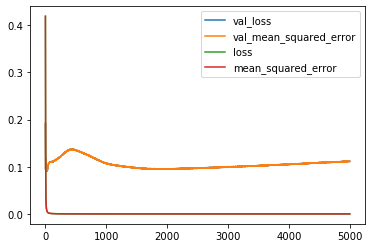

In [87]:
# to plot make data frame out of dict history.history and use .plot() method
pd.DataFrame(history_dis.history).plot()
#pyplot.show()


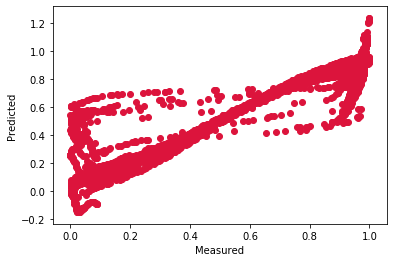

In [88]:
yhat_dis=model_dis.predict(X_dis_test.reshape(X_dis_test.shape[0], k, n_features))
#plt.gca().spines['top'].set_visible(False)

fig, ax = plt.subplots()
#plt.gca().spines['right'].set_visible(False)
ax.scatter(y_dis_test, yhat_dis,  c='crimson')
#ax.plot([y_dtest.min(), yhat.max()], [y_test.min(),  yhat.max()], 'k', lw=3)
#plt.plot(y_test, yhat, zorder=1)  
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()


In [89]:
def unscaleFunction_dis(df_original, y_values, cut_arr,  scaler):
    df_toadd = df_original[['entropyCH', 'availabilityCH', \
                            'flowCHHP', 'entropyDis', 'availabilitydis', 'flowDis']]
    df_toadd_short = df_toadd[:cut_arr.shape[0]]
    yhat_copy = y_values.copy()
    yhat_copy_df = pd.DataFrame(yhat_copy)
    yhat_copy_new_df = pd.concat([df_toadd_short, yhat_copy_df], axis =1)
    
    return scaler.inverse_transform(yhat_copy_new_df)

y_pred_unscaled_dis, y_test_unscaled_dis = unscaleFunction_dis(df_nrm_dis, yhat_dis, y_dis_test, scaler), unscaleFunction_dis(df_nrm_dis, y_dis_test,y_dis_test, scaler)

In [92]:
def array2df(arr):
    y_unscaled_df = pd.DataFrame(arr)
    y_unscaled_df =y_unscaled_df.iloc[:,6:]
    column_name  = [i  for i in range(0, y_unscaled_df.shape[1])]
    y_unscaled_df.columns  = column_name
    return y_unscaled_df

y_pred_unscaled_dis_df, y_test_unscaled_dis_df = array2df(y_pred_unscaled_dis), array2df(y_test_unscaled_dis)

In [93]:

#y_pred_unscaled_dis_df, y_test_unscaled_dis_df = array2df(y_pred_unscaled_dis), array2df(y_test_unscaled_dis)

In [94]:
y_pred_unscaled_dis_df

,0,1,2,3,4,5,6,7,8,9
0,22.768652,25.219394,27.990640,25.082877,24.060433,26.098114,22.530046,24.198479,23.972401,23.856278
1,22.757957,25.445588,27.375845,25.886224,24.994804,26.457428,23.253069,26.291247,25.512590,26.469279
2,22.735046,25.451506,27.228110,26.065050,25.121057,26.613982,23.405364,26.617573,25.743518,26.933119
3,22.705040,25.435453,27.118664,26.129897,25.135598,26.667516,23.437902,26.698218,25.791727,27.084053
4,22.732727,25.492493,27.117046,26.144872,25.190897,26.692002,23.479378,26.741970,25.851324,27.163577
...,...,...,...,...,...,...,...,...,...,...
252,19.640386,19.177127,22.521833,29.179635,32.342975,35.518605,33.679228,35.535516,34.354114,37.867552
253,19.593715,19.050172,22.548322,29.111189,32.256036,35.440392,33.567443,35.508163,34.256467,37.776171
254,19.611672,19.055180,22.704553,29.040093,32.332754,35.424679,33.476002,35.464340,34.174395,37.716822
255,19.626452,19.060928,22.734130,28.958161,32.350168,35.397681,33.435898,35.458711,34.128092,37.721481


In [95]:
def create_color_step_obj(cmap_name, n):
    """
    Return scalarMap object with n colors in gradient from color map
    given in cmap_name.
    """
    cmap = plt.get_cmap(cmap_name)
    values = range(n)
    cNorm  = clrs.Normalize(vmin=values[0], vmax=values[-1])
    scalarMap = cm.ScalarMappable(norm=cNorm, cmap=cmap)
    return scalarMap

/home/yogender/miniconda3/envs/kerasClone/lib/python3.7/site-packages/ipykernel_launcher.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


<Figure size 432x432 with 0 Axes>

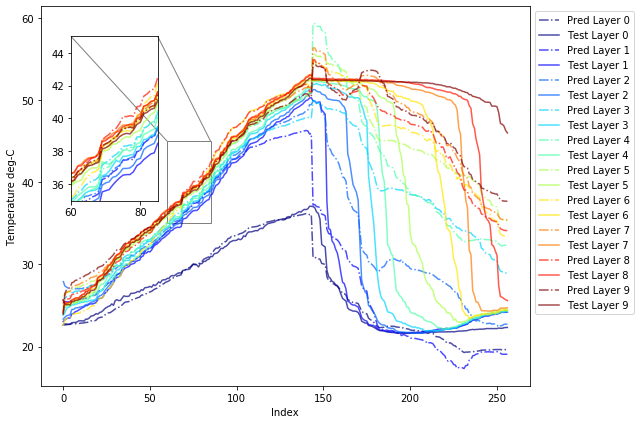

(<Figure size 648x432 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7b30113790>)

In [96]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
def plotPredAndActualTem(yhat, ytest, alpha =0.7, scm=None):
    cmap_name = "jet"
    fig = plt.figure(figsize=(6,6))
    #ax = fig.add_subplot()
    fig, ax = plt.subplots(1, figsize=(9,6))
    #fig.subplots_adjust(left=0.2, bottom=0.2)
    
    tem_Pred_df = pd.DataFrame(yhat).iloc[:,0:10]
    tem_test_df =  pd.DataFrame(ytest).iloc[:,0:10]
    
   # len_df = len(tem_Pred_df)
    
    tem_PredZoom_df = tem_Pred_df.iloc[20:40, :]
    tem_TestZoom_df = tem_test_df.iloc[20:40, :]
    
    

    scm = create_color_step_obj(cmap_name, 10)
    
    #########################
    axins = zoomed_inset_axes(ax, 2,  loc=2, borderpad=3)
    mark_inset(ax, axins, loc1=1, loc2=2, fc="none", ec="0.5")
    axins.set_xlim([60,85])
    axins.set_ylim([35,45])
    for i in range (0,  tem_Pred_df.shape[1]):
        ax.plot(tem_Pred_df.index, tem_Pred_df.iloc[:, i], color= scm.to_rgba(i, alpha=alpha),\
                label = 'Pred Layer ' + str(i),  ls='dashdot')
        ax.plot(tem_test_df.index, tem_test_df.iloc[:, i], color= scm.to_rgba(i, alpha=alpha),\
                label = 'Test Layer ' + str(i))
        


        axins.plot(tem_Pred_df.index, tem_Pred_df.iloc[:, i], color= scm.to_rgba(i, alpha=alpha),\
                label = 'Pred Layer ' + str(i),  ls='dashdot')
        
        axins.plot(tem_test_df.index, tem_test_df.iloc[:, i], color= scm.to_rgba(i, alpha=alpha),\
                label = 'Test Layer ' + str(i))

        #plt.show()
 
        '''
        sub_axes = plt.axes([.2, .55, .3, .3]) 
        sub_axes.plot(tem_PredZoom_df.index, tem_PredZoom_df.iloc[:, i], c = 'k', color= scm.to_rgba(i, alpha=alpha),\
                label = 'Pred Layer ' + str(i)) 
        sub_axes.plot( tem_TestZoom_df.index,  tem_TestZoom_df.iloc[:, i], c = 'k', color= scm.to_rgba(i, alpha=alpha),\
                label = 'Pred Layer ' + str(i),  ls='dashdot') 
        '''
    
    
        #ax.legend(bbox_to_anchor=(0.8,0.8))
        ax.set_ylabel('Temperature deg-C')
        ax.set_xlabel('Index')
        #ax.legend(bbox_to_anchor=(0.4,0.8))
    #mark_inset(ax, axins, loc1=1, loc2=1, fc="none", ec="0.1")
    fig.canvas.draw()
    ax.legend(bbox_to_anchor=(1, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
    fig.savefig(fileNameForDLFigures(midfix = 'Tem_Charging'))
    return fig, ax
plotPredAndActualTem(y_pred_unscaled_dis_df, y_test_unscaled_dis_df, alpha =0.7, scm=None)